# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

As a team member of College Board which administers the SAT, we keep tracking statewide SAT participation rate. However, SAT participation rate is still relatively low comparing with ACT participation across 51 States in U.S.                           
 After a new format of SAT released in 2016, we will do data analysis with SAT/ACT 2017 and 2018 dataset and find out potential solutions to improve SAT participation rate. 

## Executive Summary

This project provides an analysis and evaluation for SAT and ACT particiation rate and average scores in 2017 and 2018. Before proceeding data analysis, data cleaning is performed. Methods of analysis include Exploratory Data Analysis to investigate trends in the data, visualaize the data with plots and descriptive & inferential Statistics analysis. Outside research is conducted for States which are selected based on analysis and observation from previous sections. Finally, conclusion and recommendations are provided.

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import random
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code:
sat_2017 = pd.read_csv("../data/sat_2017.csv")
act_2017 = pd.read_csv("../data/act_2017.csv")

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Code:
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: In sat_2017 file, it provides SAT participation rate and average score for two subjects: Evidence-Based Reading/Writing & Math and also total score (which is the sum of average score for Evidence-Based Reading/Writing & Math) for each State in U.S. 
The participation rate is in percentage and scores are integers. The total score is not exactly sum of average score for Evidence-Based Reading/Writing & Math, but rounded to the nearest integers. 


In act_2017 file, it provides ACT participation rate and average score for subjects: English, Math, Reading, Science and Composite for each State. The participation is also given as percentage. The scores are provided as float with 1 decimal point. The composite is the average score of English, Math,Reading and Science. As same in SAT, these scores are also rounded value.  

#### 4a. Does the data look complete? 

Answer: These two files looks complete. However act_2017 file has extra row for national average data. By reading through the whole dataset (51 rows in sat_2017 and 52 rows in act_2017), there is no missing data.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://www.act.org/content/dam/act/unsecured/documents/cccr2017/ACT_2017-Average_Scores_by_State.pdf)

Answer: In sat_2017 file, for row index 20, the math score is wrong. After checking with with source data, this math score should be 524. 

In act_2017, in row index 51, the composite score is wrong. It can not be string (i.e. 20.2x). After comparing with source data, it should be 20.2. 
Furthermore in row 21, the science score is wrong. After comparing with source data, it should be 23.2.

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [5]:
# code
sat_2017.loc[(sat_2017.State == 'Maryland'),'Math'] = 524 
act_2017.loc[(act_2017.State == 'Wyoming'),'Composite']= 20.2
act_2017.iloc[21,5] = 23.2

#### 5. What are your data types? 
Display the data types of each feature. 

In [6]:
#code
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [7]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: In sat_2017 file, the Participation column should be float64.

In act_2017 file, the Participation & Composite columns should be float64.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [8]:
#code
def change_dataType(x):
    x = float(x.strip('%'))/100
    return x
    
sat_2017['Participation'] = sat_2017['Participation'].map(change_dataType)
act_2017['Participation'] = act_2017['Participation'].map(change_dataType)

- Fix any individual values preventing other columns from being the appropriate type.

In [9]:
#code

def change_dataType2(x):
    x = float(x)
    return x
act_2017['Composite'] = act_2017['Composite'].map(change_dataType2)

- Finish your data modifications by making sure the columns are now typed appropriately.

In [10]:
sat_2017['Participation'].describe()

count    51.000000
mean      0.398039
std       0.352766
min       0.020000
25%       0.040000
50%       0.380000
75%       0.660000
max       1.000000
Name: Participation, dtype: float64

In [11]:
act_2017['Participation'].describe()

count    52.000000
mean      0.651538
std       0.318325
min       0.080000
25%       0.310000
50%       0.680000
75%       1.000000
max       1.000000
Name: Participation, dtype: float64

In [12]:
act_2017['Composite'].describe()

count    52.000000
mean     21.509615
std       2.002083
min      17.800000
25%      19.800000
50%      21.400000
75%      23.600000
max      25.500000
Name: Composite, dtype: float64

- Display the data types again to confirm they are correct.

In [13]:
#Code:
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               51 non-null     object 
 1   Participation                       51 non-null     float64
 2   Evidence-Based Reading and Writing  51 non-null     int64  
 3   Math                                51 non-null     int64  
 4   Total                               51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [14]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     float64
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     float64
dtypes: float64(6), object(1)
memory usage: 3.0+ KB


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [15]:
#code
sat_2017 = sat_2017.rename(columns = {'Participation':'sat_Par17',
                                      'Evidence-Based Reading and Writing':'sat_EBRW17',
                                      'Math':'sat_Math17',
                                      'Total':'sat_Total17'}, inplace = False)
sat_2017.columns = [x.lower() for x in sat_2017.columns]
sat_2017.head()

,state,sat_par17,sat_ebrw17,sat_math17,sat_total17
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055


In [16]:
act_2017 = act_2017.rename(columns = {'Participation':'act_Par17',
                                      'English':'act_Eng17',
                                      'Math':'act_Math17',
                                      'Reading':'act_Read17', 
                                      'Science':'act_Sci17', 
                                      'Composite':'act_Compo17'}, inplace = False)
act_2017.columns = [x.lower() for x in act_2017.columns]
act_2017.head()

,state,act_par17,act_eng17,act_math17,act_read17,act_sci17,act_compo17
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|SAT & ACT|State name
|sat_par17|float64|SAT|SAT pariticipation rate for each State in 2017
|sat_ebrw17|int64|SAT|SAT average score for Evidence-Based Reading and Writing for each State in 2017
|sat_math17|int64|SAT|SAT average Math score for each State in 2017
|sat_total17|int64|SAT|SAT average total score for each State in 2017
|act_par17|float64|ACT|ACT pariticipation rate for each State in 2017
|act_eng17|float64|ACT|ACT average English score for each State in 2017
|act_math17|float64|ACT|ACT average Math score for each State in 2017
|act_read17|float64|ACT|ACT average Reading score for each State in 2017
|act_sci17|float64|ACT|ACT average Science score for each State in 2017
|act_compo17|float64|ACT|ACT average Composite score for each State in 2017

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [17]:
#code
act_2017 = act_2017.drop(0)

In [18]:
act_2017.head()

,state,act_par17,act_eng17,act_math17,act_read17,act_sci17,act_compo17
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
5,California,0.31,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [19]:
#Code:
combined_2017 = pd.merge(sat_2017, act_2017, on='state', how='outer')

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [20]:
#code
combined_2017.to_csv("../data/combined_2017.csv")

## 2018 Data Import & Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

#### 1. Read In SAT & ACT  Data

Read in the `sat_2018.csv` and `act_2018_updated.csv` files and assign them to appropriately named pandas dataframes.

In [21]:
#read data for year 2018 from csv
sat_2018 = pd.read_csv("../data/sat_2018.csv")
act_2018 = pd.read_csv("../data/act_2018_updated.csv")

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [22]:
sat_2018.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076
5,Colorado,100%,519,506,1025
6,Connecticut,100%,535,519,1053
7,Delaware,100%,505,492,998
8,District of Columbia,92%,497,480,977
9,Florida,56%,550,549,1099


In [23]:
act_2018.head(10)

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1
5,Colorado,30,23.9,23.9,23.2,24.4,23.5
6,Connecticut,26,25.6,26.0,24.8,26.1,24.9
7,Delaware,17,23.2,23.7,23.1,24.5,23.4
8,District of Columbia,32,23.6,23.7,22.7,24.4,23.0
9,Florida,66,19.9,19.2,19.3,21.1,19.5


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: In sat_2018 file, it SAT provides participation rate and average score for two subjects: Evidence-Based Reading/Writing & Math and also total score (which is the sum of average score for Evidence-Based Reading/Writing & Math) for each State in U.S. 
The participation rate is in percentage and scores are integers. As same observation when dealing with 2017 data, the total score is not exactly sum of average score for Evidence-Based Reading/Writing & Math, but rounded to the nearest integers.


In act_2018 file, it provides ACT participation rate and average score for subjects: English, Math, Reading, Science and Composite for each State. The participation is given as intgeter (max is 100). We need to do data convert for this column. The scores are provided as float with 1 decimal point. The composite is the average score of English, Math,Reading and Science. As same in SAT, these scores are also rounded value. 

#### 4a. Does the data look complete? 

Answer: These two files looks complete. By reading through the whole dataset (51 rows in both sat_2018 and act_2018 files), there is no missing data. 

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer: By gone through the complete dataset for sat_2018 & act_2018, there is no obvious data issues. Will proceed to check the data type is proper for each column. 

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

#### 5. What are your data types? 
Display the data types of each feature. 

In [24]:
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [25]:
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          51 non-null     object 
 1   Percentage of Students Tested  51 non-null     int64  
 2   Average Composite Score        51 non-null     float64
 3   Average English Score          51 non-null     float64
 4   Average Math Score             51 non-null     float64
 5   Average Reading Score          51 non-null     float64
 6   Average Science Score          51 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


What did you learn?

- Do any of them seem odd?
- Which ones are not as they should be?

Answer: In sat_2018 dataset, the participation rate should not be as object data type. Will change this column as float. 
In act_2018 dataset, the participation rate should not be as int64 data type. Will convert this column as float (as rate).

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [26]:
#code
def change_dataType(x):
    x = float(x.strip('%'))/100
    return x
    
sat_2018['Participation'] = sat_2018['Participation'].map(change_dataType)

In [27]:
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               51 non-null     object 
 1   Participation                       51 non-null     float64
 2   Evidence-Based Reading and Writing  51 non-null     int64  
 3   Math                                51 non-null     int64  
 4   Total                               51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [28]:
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.06,595,571,1166
1,Alaska,0.43,562,544,1106
2,Arizona,0.29,577,572,1149
3,Arkansas,0.05,592,576,1169
4,California,0.60,540,536,1076


In [29]:
def change_dataType3(x):
    x = float(x/100)
    return x
    
act_2018['Percentage of Students Tested'] = act_2018['Percentage of Students Tested'].map(change_dataType3)

In [30]:
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          51 non-null     object 
 1   Percentage of Students Tested  51 non-null     float64
 2   Average Composite Score        51 non-null     float64
 3   Average English Score          51 non-null     float64
 4   Average Math Score             51 non-null     float64
 5   Average Reading Score          51 non-null     float64
 6   Average Science Score          51 non-null     float64
dtypes: float64(6), object(1)
memory usage: 2.9+ KB


In [31]:
act_2018.head()

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,1.00,19.1,18.9,18.3,19.6,19.0
1,Alaska,0.33,20.8,19.8,20.6,21.6,20.7
2,Arizona,0.66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,1.00,19.4,19.1,18.9,19.7,19.4
4,California,0.27,22.7,22.5,22.5,23.0,22.1


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [32]:
sat_2018 = sat_2018.rename(columns = {'Participation':'sat_Par18',
                                      'Evidence-Based Reading and Writing':'sat_EBRW18',
                                      'Math':'sat_Math18',
                                      'Total':'sat_Total18'}, inplace = False)
sat_2018.columns = [x.lower() for x in sat_2018.columns]
sat_2018.head()

,state,sat_par18,sat_ebrw18,sat_math18,sat_total18
0,Alabama,0.06,595,571,1166
1,Alaska,0.43,562,544,1106
2,Arizona,0.29,577,572,1149
3,Arkansas,0.05,592,576,1169
4,California,0.60,540,536,1076


In [33]:
act_2018 = act_2018.rename(columns = {'Percentage of Students Tested':'act_par18',
                                      'Average English Score':'act_Eng18',
                                      'Average Math Score':'act_math18',
                                      'Average Reading Score':'act_read18', 
                                      'Average Science Score':'act_Sci18', 
                                      'Average Composite Score':'act_Compo18'}, inplace = False)
act_2018.columns = [x.lower() for x in act_2018.columns]
act_2018.head()

,state,act_par18,act_compo18,act_eng18,act_math18,act_read18,act_sci18
0,Alabama,1.00,19.1,18.9,18.3,19.6,19.0
1,Alaska,0.33,20.8,19.8,20.6,21.6,20.7
2,Arizona,0.66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,1.00,19.4,19.1,18.9,19.7,19.4
4,California,0.27,22.7,22.5,22.5,23.0,22.1


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|SAT & ACT|State name
|sat_par18|float64|SAT|SAT pariticipation rate for each State in 2018
|sat_ebrw18|int64|SAT|SAT average score for Evidence-Based Reading and Writing for each State in 2018
|sat_math18|int64|SAT|SAT average Math score for each State in 2018
|sat_total18|int64|SAT|SAT average total score for each State in 2018
|act_par18|float64|ACT|ACT pariticipation rate for each State in 2018
|act_eng18|float64|ACT|ACT average English score for each State in 2018
|act_math18|float64|ACT|ACT average Math score for each State in 2018
|act_read18|float64|ACT|ACT average Reading score for each State in 2018
|act_sci18|float64|ACT|ACT average Science score for each State in 2018
|act_compo18|float64|ACT|ACT average Composite score for each State in 2018

#### 9. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [34]:
combined_2018 = pd.merge(sat_2018, act_2018, on='state', how='outer')

In [35]:
combined_2018.head()

,state,sat_par18,sat_ebrw18,sat_math18,sat_total18,act_par18,act_compo18,act_eng18,act_math18,act_read18,act_sci18
0,Alabama,0.06,595,571,1166,1.00,19.1,18.9,18.3,19.6,19.0
1,Alaska,0.43,562,544,1106,0.33,20.8,19.8,20.6,21.6,20.7
2,Arizona,0.29,577,572,1149,0.66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,0.05,592,576,1169,1.00,19.4,19.1,18.9,19.7,19.4
4,California,0.60,540,536,1076,0.27,22.7,22.5,22.5,23.0,22.1


#### 10. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [36]:
combined_2018.to_csv("../data/combined_2018.csv")

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [37]:
final = pd.merge(combined_2017, combined_2018, on='state', how='outer')

In [38]:
final.to_csv("../data/final.csv")

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [39]:
#Code:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
sat_par17,51.0,0.398039,0.352766,0.02,0.040,0.38,0.660,1.0
sat_ebrw17,51.0,569.117647,45.666901,482.00,533.500,559.00,613.000,644.0
sat_math17,51.0,556.882353,47.121395,468.00,523.500,548.00,599.000,651.0
sat_total17,51.0,1126.098039,92.494812,950.00,1055.500,1107.00,1212.000,1295.0
act_par17,51.0,0.652549,0.321408,0.08,0.310,0.69,1.000,1.0
act_eng17,51.0,20.931373,2.353677,16.30,19.000,20.70,23.300,25.5
act_math17,51.0,21.182353,1.981989,18.00,19.400,20.90,23.100,25.3
act_read17,51.0,22.013725,2.067271,18.10,20.450,21.80,24.150,26.0
act_sci17,51.0,21.450980,1.739353,18.20,19.950,21.30,23.200,24.9
act_compo17,51.0,21.519608,2.020695,17.80,19.800,21.40,23.600,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [40]:
#code
def stdDev(s):
    mean = s.mean()
    count = 0
    sqrt_sum = 0
    
    for index, value in s.items(): 
        count += 1
        sqrt_sum += (value - mean)**2
        
    return (sqrt_sum / count)**(1/2)

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [41]:
#Code:
sd = {x:stdDev(final[x]) for x in final.select_dtypes(include=np.number).columns.tolist()}

In [42]:
sd

{'sat_par17': 0.3492907076664507,
 'sat_ebrw17': 45.21697020437866,
 'sat_math17': 46.65713364485503,
 'sat_total17': 91.58351056778743,
 'act_par17': 0.3182417575123181,
 'act_eng17': 2.3304876369363363,
 'act_math17': 1.9624620273436781,
 'act_read17': 2.0469029314842646,
 'act_sci17': 1.7222161451443676,
 'act_compo17': 2.000786081581989,
 'sat_par18': 0.3694661922353942,
 'sat_ebrw18': 47.03460978357609,
 'sat_math18': 47.30194550378352,
 'sat_total18': 93.22742384464433,
 'act_par18': 0.33745194881997503,
 'act_compo18': 2.0855261815801147,
 'act_eng18': 2.4222536143202795,
 'act_math18': 2.015707255555717,
 'act_read18': 2.145891884510421,
 'act_sci18': 1.8516885484833543}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer: No. The manually calculated standard deviations is different from the output from pandas describe and also not the same as np.std() method. The output from pandas describe matches up with numpy std method. However, in numpy std methed, there is one parameter ddof(degree of freedom). By default, ddof = 1, which has the same result as pandas describe output. If we set ddof = 0 in numpy std methed, the result matches up with our manually calculated standard deviation. 

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [45]:
#code
# District of Columbia / Michigan / Connecticut / Delaware have highest participation rate for 2017 SAT, which is 100%.
final[['state', 'sat_par17']].sort_values(by=['sat_par17'], ascending=False).head()

,state,sat_par17
8,District of Columbia,1.00
22,Michigan,1.00
6,Connecticut,1.00
7,Delaware,1.00
29,New Hampshire,0.96


2017 SAT highest participation rates 
- District of Columbia/Michigan/Connecticut/Delaware have highest participation rate in 2017 SAT, which is 1.00 (i.e. 100%). 

In [46]:
# North Dakota / Mississippi / Iowa have lowest participation rate for 2017 SAT, which is 2%.
final[['state', 'sat_par17']].sort_values(by=['sat_par17'], ascending=True).head()

,state,sat_par17
34,North Dakota,0.02
24,Mississippi,0.02
15,Iowa,0.02
25,Missouri,0.03
44,Utah,0.03


2017 SAT lowest participation rate:
- District of Columbia/Michigan/Connecticut/Delaware have highest participation rate in 2017 SAT, which is 0.02 (i.e. 2%). 

In [47]:
# Colorado / Connecticut / Delaware / Michigan / Idaho have highest participation rate for 2018 SAT, which is 100%
final[['state', 'sat_par18']].sort_values(by=['sat_par18'], ascending=False).head(10)

,state,sat_par18
5,Colorado,1.00
6,Connecticut,1.00
7,Delaware,1.00
22,Michigan,1.00
12,Idaho,1.00
19,Maine,0.99
13,Illinois,0.99
39,Rhode Island,0.97
29,New Hampshire,0.96
8,District of Columbia,0.92


2018 SAT highest participation rate
- Colorado/Connecticut/Delaware/Michigan/Idaho have highest participation rate in 2018 SAT, which is 1.00 (i.e. 100%).

In [48]:
# North Dakota has lowest participation rate for 2018 SAT, which is 2%.
final[['state', 'sat_par18']].sort_values(by=['sat_par18'], ascending=True).head(10)

,state,sat_par18
34,North Dakota,0.02
50,Wyoming,0.03
41,South Dakota,0.03
27,Nebraska,0.03
49,Wisconsin,0.03
24,Mississippi,0.03
15,Iowa,0.03
44,Utah,0.04
23,Minnesota,0.04
18,Louisiana,0.04


2018 SAT lowest participation rate
- North Dakota still has the lowest participation rate in 2018 SAT, which is 0.02(i.e.2%)

In [49]:
# This list of States have highest participation rate in 2017 ACT
final.loc[(final['act_par17']==1.00),['state', 'act_par17']]

,state,act_par17
0,Alabama,1.0
3,Arkansas,1.0
5,Colorado,1.0
17,Kentucky,1.0
18,Louisiana,1.0
23,Minnesota,1.0
24,Mississippi,1.0
25,Missouri,1.0
26,Montana,1.0
28,Nevada,1.0


2017 ACT highest participation rate
- 17 States have 100% participation rate in 2017 ACT, i.e. 
  Alabama/Arkansas/Colorado/Kentucky/Louisiana/Minnesota/Mississippi/Missouri/Montana/Nevada/North Carolina
  /Oklahoma/South Carolina/Tennessee/Utah/Wisconsin/Wyoming

In [50]:
# Maine has lowest participation rate in 2017 ACT, which is 8%. 
final[['state', 'act_par17']].sort_values(by=['act_par17'], ascending=True).head(10)

,state,act_par17
19,Maine,0.08
29,New Hampshire,0.18
7,Delaware,0.18
39,Rhode Island,0.21
38,Pennsylvania,0.23
20,Maryland,0.28
45,Vermont,0.29
21,Massachusetts,0.29
22,Michigan,0.29
46,Virginia,0.29


2017 ACT lowest participation rate:
- Maine has the lowest participation rate in 2017 ACT, only 0.08 (i.e.8%).

In [51]:
# this list of States have highest participation rate in 2018 ACT
final.loc[(final['act_par18']==1.00),['state', 'act_par18']]

,state,act_par18
0,Alabama,1.0
3,Arkansas,1.0
17,Kentucky,1.0
18,Louisiana,1.0
24,Mississippi,1.0
25,Missouri,1.0
26,Montana,1.0
27,Nebraska,1.0
28,Nevada,1.0
33,North Carolina,1.0


2018 ACT highest participation rate:
- 17 States have 100% participation rate in 2018 ACT, i.e.
   Alabama/Arkansas/Kentucky/Louisiana/Mississippi/Missouri/Montana/Nebraska/Nevada/North Carolina
  /Ohio/Oklahoma/South Carolina/Tennessee/Utah/Wisconsin/Wyoming

In [52]:
# Maine has lowest participation rate in 2018 ACT, which is 7%.
final[['state', 'act_par18']].sort_values(by=['act_par18'], ascending=True).head(10)

,state,act_par18
19,Maine,0.07
39,Rhode Island,0.15
29,New Hampshire,0.16
7,Delaware,0.17
38,Pennsylvania,0.20
22,Michigan,0.22
47,Washington,0.24
45,Vermont,0.24
46,Virginia,0.24
21,Massachusetts,0.25


2018 ACT lowest participation rate:
- Maine still has the lowest participation rate in 2018 ACT, only 0.07 (i.e. 7%).

In [53]:
# Minnesota has the highest mean total score in 2017 SAT, which is 1295. 
final.groupby('state')['sat_total17'].mean().sort_values(ascending=False)

state
Minnesota               1295
Wisconsin               1291
Iowa                    1275
Missouri                1271
Kansas                  1260
North Dakota            1256
Nebraska                1253
Kentucky                1247
Mississippi             1242
Utah                    1238
Wyoming                 1230
Tennessee               1228
South Dakota            1216
Arkansas                1208
Colorado                1201
Louisiana               1198
Montana                 1196
Alabama                 1165
Ohio                    1149
New Mexico              1138
Arizona                 1116
Nevada                  1116
Illinois                1115
Vermont                 1114
Oregon                  1108
Massachusetts           1107
Virginia                1102
West Virginia           1086
Hawaii                  1085
North Carolina          1081
Alaska                  1080
Washington              1075
Indiana                 1074
Pennsylvania            1071
South Ca

2017 SAT highest mean total score:
- Minnesota has highest mean total score, 1295. 

In [54]:
#District of Columbia has the lowest total score in 2017 SAT, which is 950. 
final.groupby('state')['sat_total17'].mean().sort_values(ascending=True)

state
District of Columbia     950
Delaware                 996
Idaho                   1005
Michigan                1005
Maine                   1012
Florida                 1017
Texas                   1020
Connecticut             1041
Oklahoma                1047
Georgia                 1050
New York                1052
New Hampshire           1052
California              1055
New Jersey              1056
Maryland                1060
Rhode Island            1062
South Carolina          1064
Pennsylvania            1071
Indiana                 1074
Washington              1075
Alaska                  1080
North Carolina          1081
Hawaii                  1085
West Virginia           1086
Virginia                1102
Massachusetts           1107
Oregon                  1108
Vermont                 1114
Illinois                1115
Nevada                  1116
Arizona                 1116
New Mexico              1138
Ohio                    1149
Alabama                 1165
Montana 

2017 SAT lowest mean total score:
- District of Columbia has lowest mean total score, 950. 

In [55]:
# Minnesota also has the highest total score in 2018 SAT, which is 1298. 
final.groupby('state')['sat_total18'].mean().sort_values(ascending=False)

state
Minnesota               1298
Wisconsin               1294
North Dakota            1283
Iowa                    1265
Kansas                  1265
Missouri                1262
Wyoming                 1257
Nebraska                1252
Kentucky                1248
South Dakota            1240
Mississippi             1236
Tennessee               1231
Louisiana               1210
Montana                 1198
Arkansas                1169
Alabama                 1166
Arizona                 1149
Nevada                  1140
Massachusetts           1125
Vermont                 1120
Oregon                  1117
Virginia                1117
Alaska                  1106
Florida                 1099
Ohio                    1099
North Carolina          1098
New Jersey              1094
New Mexico              1093
Pennsylvania            1086
Washington              1081
Maryland                1080
California              1076
Indiana                 1074
South Carolina          1070
New York

2018 SAT higest mean total score:
- Minnesota still has highest mean total score, 1298. 

In [56]:
# District of Columbia still has the lowest total score in 2018 SAT, which is 977. 
final.groupby('state')['sat_total18'].mean().sort_values(ascending=True)

state
District of Columbia     977
Delaware                 998
West Virginia            999
Idaho                   1001
Utah                    1010
Hawaii                  1010
Michigan                1011
Maine                   1013
Rhode Island            1018
Illinois                1019
Colorado                1025
Texas                   1032
Connecticut             1053
Oklahoma                1062
New Hampshire           1063
Georgia                 1064
New York                1068
South Carolina          1070
Indiana                 1074
California              1076
Maryland                1080
Washington              1081
Pennsylvania            1086
New Mexico              1093
New Jersey              1094
North Carolina          1098
Ohio                    1099
Florida                 1099
Alaska                  1106
Oregon                  1117
Virginia                1117
Vermont                 1120
Massachusetts           1125
Nevada                  1140
Arizona 

2018 SAT lowest mean total score:
- District of Columbia still has lowest mean total score, 977.

In [57]:
# New Hampshire has the highest composite score in 2017 ACT, which 25.5.
final.groupby('state')['act_compo17'].mean().sort_values(ascending=False)

state
New Hampshire           25.5
Massachusetts           25.4
Connecticut             25.2
Maine                   24.3
District of Columbia    24.2
New York                24.2
Michigan                24.1
Delaware                24.1
Rhode Island            24.0
New Jersey              23.9
Virginia                23.8
Pennsylvania            23.7
Maryland                23.6
Vermont                 23.6
California              22.8
Indiana                 22.6
Idaho                   22.3
Ohio                    22.0
Washington              21.9
Iowa                    21.9
South Dakota            21.8
Oregon                  21.8
Kansas                  21.7
Minnesota               21.5
Illinois                21.4
Georgia                 21.4
Nebraska                21.4
Colorado                20.8
Texas                   20.7
Wisconsin               20.5
Missouri                20.4
West Virginia           20.4
Montana                 20.3
Utah                    20.3
North Da

2017 ACT highest mean composite score:
- New Hampshire has the highest mean composite score, 25.5.

In [58]:
# Nevada has the lowest composite score in 2017 ACT, which is 17.8. 
final.groupby('state')['act_compo17'].mean().sort_values(ascending=True)

state
Nevada                  17.8
Mississippi             18.6
South Carolina          18.7
Hawaii                  19.0
North Carolina          19.1
Alabama                 19.2
Arkansas                19.4
Oklahoma                19.4
Louisiana               19.5
Arizona                 19.7
New Mexico              19.7
Alaska                  19.8
Tennessee               19.8
Florida                 19.8
Kentucky                20.0
Wyoming                 20.2
Utah                    20.3
North Dakota            20.3
Montana                 20.3
Missouri                20.4
West Virginia           20.4
Wisconsin               20.5
Texas                   20.7
Colorado                20.8
Illinois                21.4
Georgia                 21.4
Nebraska                21.4
Minnesota               21.5
Kansas                  21.7
Oregon                  21.8
South Dakota            21.8
Washington              21.9
Iowa                    21.9
Ohio                    22.0
Idaho   

2017 ACT lowest mean composite score:
- Nevada has the lowest mean composite score, 17.8.

In [59]:
# Connecticut has the highest composite score in 2018 ACT, which is 25.6. 
final.groupby('state')['act_compo18'].mean().sort_values(ascending=False)

state
Connecticut             25.6
Massachusetts           25.5
New Hampshire           25.1
New York                24.5
Michigan                24.4
Rhode Island            24.2
Vermont                 24.1
Maine                   24.0
Virginia                23.9
Colorado                23.9
Illinois                23.9
New Jersey              23.7
District of Columbia    23.6
Pennsylvania            23.5
Delaware                23.2
California              22.7
Indiana                 22.5
Maryland                22.5
Idaho                   22.3
Washington              22.2
South Dakota            21.9
Iowa                    21.8
Kansas                  21.6
Georgia                 21.4
Oregon                  21.3
Minnesota               21.3
Alaska                  20.8
Texas                   20.6
Wisconsin               20.5
Utah                    20.4
North Dakota            20.3
Ohio                    20.3
West Virginia           20.3
Kentucky                20.2
Nebraska

2018 ACT highest mean composite score:
- Connecticut has the highest mean composite score, 25.6.

In [60]:
#Nevada still has lowest composite score in 2018 ACT. 
final.groupby('state')['act_compo18'].mean().sort_values(ascending=True)

state
Nevada                  17.7
South Carolina          18.3
Mississippi             18.6
Hawaii                  18.9
Alabama                 19.1
North Carolina          19.1
Arizona                 19.2
Louisiana               19.2
Oklahoma                19.3
Arkansas                19.4
New Mexico              19.4
Tennessee               19.6
Florida                 19.9
Montana                 20.0
Missouri                20.0
Wyoming                 20.0
Nebraska                20.1
Kentucky                20.2
West Virginia           20.3
Ohio                    20.3
North Dakota            20.3
Utah                    20.4
Wisconsin               20.5
Texas                   20.6
Alaska                  20.8
Oregon                  21.3
Minnesota               21.3
Georgia                 21.4
Kansas                  21.6
Iowa                    21.8
South Dakota            21.9
Washington              22.2
Idaho                   22.3
Indiana                 22.5
Maryland

2018 ACT lowest composite score:
- Nevada still has the lowest mean composite score, 17.7.

In [61]:
# Insert one column to indicate participation rate change between 2018 SAT and 2017 SAT. 
final['sat_par_change'] = final['sat_par18'] - final['sat_par17']

In [62]:
# Colorado's SAT participation rate increases from 11% to 100%, which is 89% increase. 
# District of Columbia's SAT participation rate decreaes from 100% in 2017 to 92% in 2018, which is 8% decrease. 
# Idaho's SAT participation rate increases from 93% to 100%, which is 7% increase.

final.loc[((final['sat_par17'] == 1) | (final['sat_par18'] == 1)) & (final['sat_par_change'] != 0), ['state','sat_par17','sat_par18', 'sat_par_change']]

,state,sat_par17,sat_par18,sat_par_change
5,Colorado,0.11,1.00,0.89
8,District of Columbia,1.00,0.92,-0.08
12,Idaho,0.93,1.00,0.07


For SAT 100% participation have a rate change year-to-year
- Colorado's SAT participation rate increases from 11% to 100%, which is 89% increase. 
- District of Columbia's SAT participation rate decreases from 100% in 2017 to 92% in 2018, which is 8% decrease. 
- Idaho's SAT participation rate increases from 93% to 100%, which is 7% increase.

In [63]:
# We also sort sat_par_change in descending order. 
# We can see that Illinois and Colorado's SAT participation rate increase Significantly from 2017 to 2018, 
# which are 90% increase for Illinois and 89% increase for Colorado. 

# There are also States whose SAT pariticipatio rate decresing. For example, Florida's SAT participation rate decreaes by 27%. 
final[['state','sat_par17', 'sat_par18', 'sat_par_change']].sort_values(by = 'sat_par_change',ascending = False)

,state,sat_par17,sat_par18,sat_par_change
13,Illinois,0.09,0.99,0.90
5,Colorado,0.11,1.00,0.89
39,Rhode Island,0.71,0.97,0.26
48,West Virginia,0.14,0.28,0.14
30,New Jersey,0.70,0.82,0.12
32,New York,0.67,0.79,0.12
10,Georgia,0.61,0.70,0.09
20,Maryland,0.69,0.76,0.07
12,Idaho,0.93,1.00,0.07
4,California,0.53,0.60,0.07


Sort SAT participation rate change in descending order. The following is the observation. 
- Besides Colorado, We can see that Illinois' SAT participation rate increase by 90%. 

In [64]:
# Insert on column to indicate participation rate change between 2018 ACT and 2017 ACT.
final['act_par_change'] = final['act_par18'] - final['act_par17']

In [65]:
# Some States' ACT participation rate for ACT decreases, i.e. Colorado and Minnesota. 
# Colorado's ACT participation rate decreases dramatically by 70%. However, we see 89% increased in its SAT participation rate. 

# Some States' ACT participation rate for ACT increases by 16%~25%, i.e. Colorado and Minnesota. 

final.loc[((final['act_par17'] == 1) | (final['act_par18'] == 1)) & (final['act_par_change'] != 0), ['state','act_par17','act_par18', 'act_par_change']]

,state,act_par17,act_par18,act_par_change
5,Colorado,1.00,0.30,-0.70
23,Minnesota,1.00,0.99,-0.01
27,Nebraska,0.84,1.00,0.16
35,Ohio,0.75,1.00,0.25


ACT 100% participation on a given test have a rate change year-to-year
- Colorado's participation rate for ACT decreases by 70%, from 100% in 2017 to 30% in 2018. 
- Minnesota's participation rate for ACT decreases by 1% from 100% in 2017 to 99% in 2018.
- Nebraska's participation rate for ACT increases by 16% from 84% in 2017 to 100% in 2018.
- Ohio's participation rate for ACT increases by 25% from 75% in 2017 to 100% in 2018.

In [66]:
# We also sort act_par_change in descending order. 
# We can see that some States' ACT participation rate increase by 1% ~25%.  

# There are also States whose ACT pariticipatio rate decresing. 
# For example, Illinois's ACT participation rate decreaes by 50%.
# Colorado's ACT participation rate decreaes by 70%.

final[['state','act_par17', 'act_par18', 'act_par_change']].sort_values(by = 'act_par_change',ascending = True)

,state,act_par17,act_par18,act_par_change
5,Colorado,1.00,0.30,-0.70
13,Illinois,0.93,0.43,-0.50
1,Alaska,0.65,0.33,-0.32
22,Michigan,0.29,0.22,-0.07
9,Florida,0.73,0.66,-0.07
39,Rhode Island,0.21,0.15,-0.06
47,Washington,0.29,0.24,-0.05
45,Vermont,0.29,0.24,-0.05
6,Connecticut,0.31,0.26,-0.05
46,Virginia,0.29,0.24,-0.05


Sort ACT participation rate change in descending order. The following is the observation. 
- Colorado and Illinois' ACT participation rate decreases dramatically by 70% and 50% seperately

In [67]:
# Show States whose participation rate for both SAT & ACT are above 50% in 2017
final.loc[((final['sat_par17'] > 0.5) & (final['act_par17'] > 0.5)), ['state','sat_par17','act_par17']]

,state,sat_par17,act_par17
9,Florida,0.83,0.73
10,Georgia,0.61,0.55
11,Hawaii,0.55,0.90


States show have >50% participation on both tests for 2017:
- Florida, Georgia and Hawaii have more than 50% participation rate on both SAT and ACT tests in both 2017. 

In [68]:
# Show States whose participation rate for both SAT & ACT are above 50% in 2018
final.loc[((final['sat_par18'] > 0.5) & (final['act_par18'] > 0.5)), ['state','sat_par18','act_par18']]

,state,sat_par18,act_par18
9,Florida,0.56,0.66
10,Georgia,0.70,0.53
11,Hawaii,0.56,0.89
33,North Carolina,0.52,1.00
40,South Carolina,0.55,1.00


States show have >50% participation on both tests for 2018:
- Florida, Georgia, Hawaii, North Carolina and South Carolina have more that 50% participation rate on both SAT and ACT tests in 2018.

- Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

Answers: 

From the above observations, expecially from SAT participation rate change, I am interested in Colorado and Illinois whose SAT participation rates increase significantly by 89% and 90% respectively from 2017 to 2018.

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [69]:
final.corr()

,sat_par17,sat_ebrw17,sat_math17,sat_total17,act_par17,act_eng17,act_math17,act_read17,act_sci17,act_compo17,...,sat_math18,sat_total18,act_par18,act_compo18,act_eng18,act_math18,act_read18,act_sci18,sat_par_change,act_par_change
sat_par17,1.000000,-0.874326,-0.855091,-0.867540,-0.841234,0.686889,0.710697,0.705352,0.653670,0.694748,...,-0.686941,-0.684556,-0.792382,0.639323,0.645332,0.649435,0.651892,0.611675,-0.144239,0.002442
sat_ebrw17,-0.874326,1.000000,0.987056,0.996661,0.716153,-0.461345,-0.486126,-0.488441,-0.422130,-0.470382,...,0.865909,0.849798,0.702481,-0.440915,-0.447026,-0.450128,-0.460779,-0.410872,0.015636,0.068672
sat_math17,-0.855091,0.987056,1.000000,0.996822,0.682572,-0.420673,-0.420456,-0.442410,-0.365515,-0.417817,...,0.878982,0.849583,0.667444,-0.388769,-0.403532,-0.384444,-0.414636,-0.355104,0.039272,0.060136
sat_total17,-0.867540,0.996661,0.996822,1.000000,0.701477,-0.441947,-0.454116,-0.466558,-0.394559,-0.445020,...,0.875601,0.852727,0.687107,-0.415762,-0.426210,-0.418011,-0.438811,-0.383698,0.027305,0.064783
act_par17,-0.841234,0.716153,0.682572,0.701477,1.000000,-0.843501,-0.861114,-0.866620,-0.836595,-0.858134,...,0.555406,0.545179,0.919171,-0.775514,-0.763176,-0.782878,-0.789497,-0.763334,0.079274,-0.060575
act_eng17,0.686889,-0.461345,-0.420673,-0.441947,-0.843501,1.000000,0.967803,0.985999,0.980042,0.990856,...,-0.365787,-0.361303,-0.796637,0.932535,0.937173,0.918868,0.930897,0.922873,0.061803,-0.002924
act_math17,0.710697,-0.486126,-0.420456,-0.454116,-0.861114,0.967803,1.000000,0.979630,0.986929,0.990451,...,-0.340094,-0.351847,-0.813410,0.933247,0.910684,0.948795,0.924997,0.930087,0.049840,-0.003337
act_read17,0.705352,-0.488441,-0.442410,-0.466558,-0.866620,0.985999,0.979630,1.000000,0.988034,0.995069,...,-0.374075,-0.373195,-0.813021,0.929711,0.916256,0.923622,0.937214,0.926420,0.027661,0.010810
act_sci17,0.653670,-0.422130,-0.365515,-0.394559,-0.836595,0.980042,0.986929,0.988034,1.000000,0.995129,...,-0.315431,-0.321679,-0.784996,0.934586,0.915850,0.936559,0.930810,0.939334,0.060573,0.010073
act_compo17,0.694748,-0.470382,-0.417817,-0.445020,-0.858134,0.990856,0.990451,0.995069,0.995129,1.000000,...,-0.354639,-0.357463,-0.808497,0.939271,0.927275,0.938748,0.937604,0.935847,0.053821,0.001993


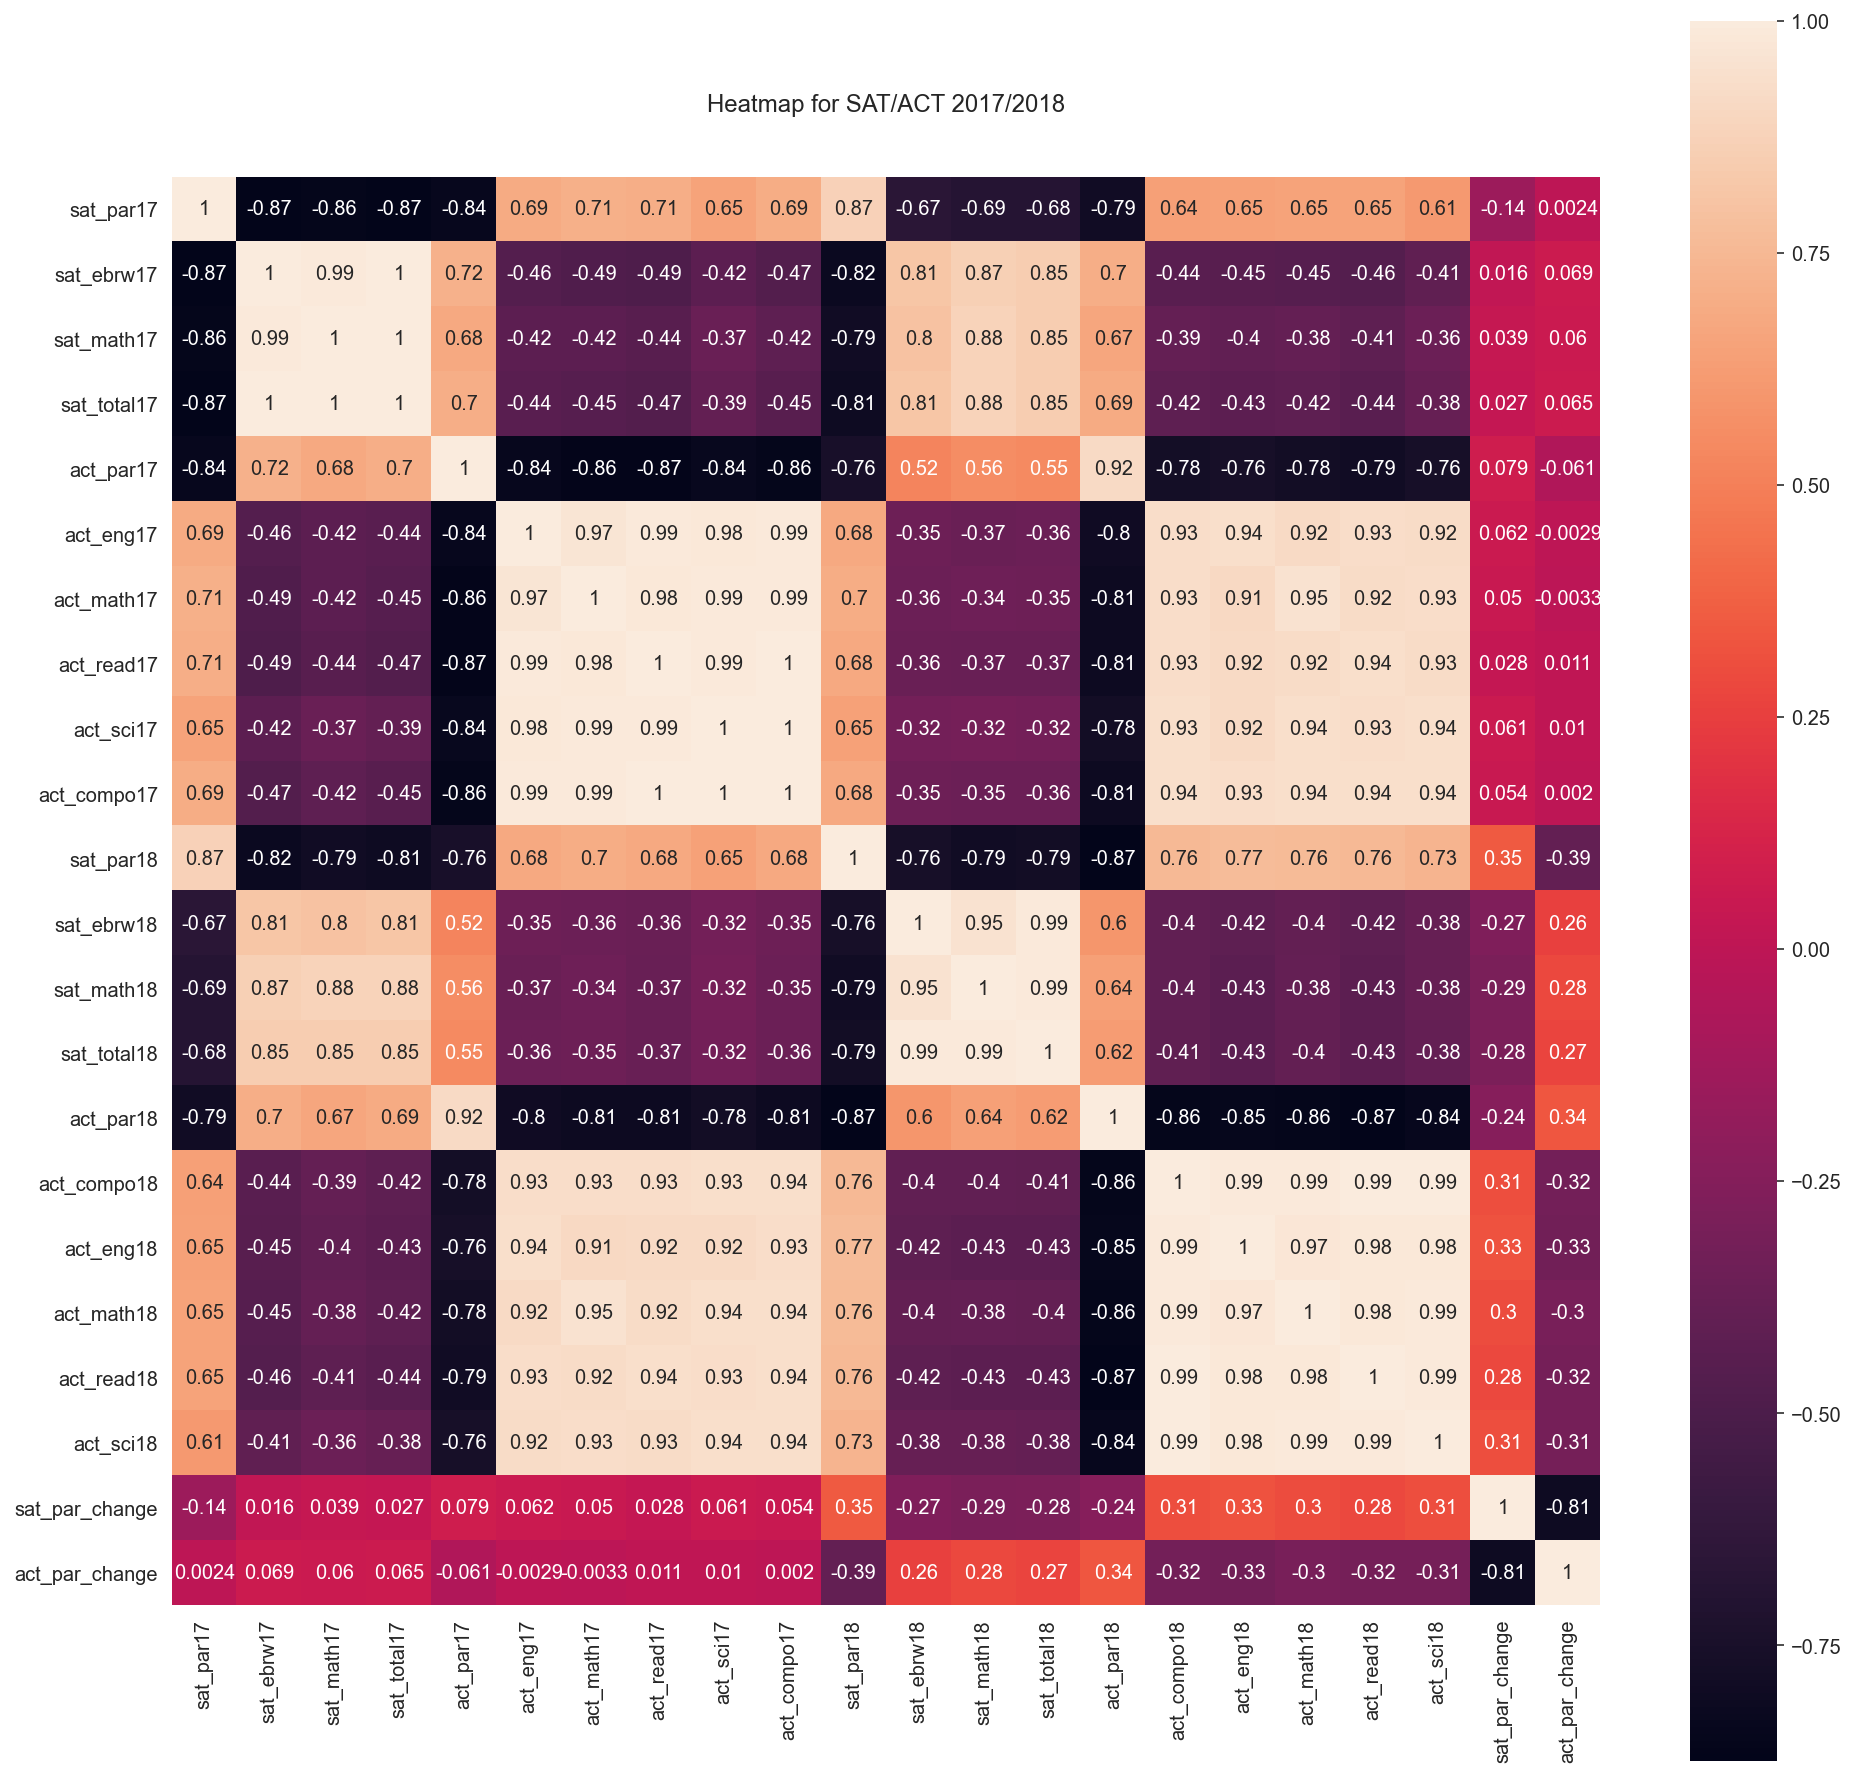

In [70]:
plt.figure(figsize=(16,16))
plt.title("Heatmap for SAT/ACT 2017/2018\n\n")
sns.heatmap(final.corr(), vmax=1, square=True, annot=True);

### Interpretion of heatmap:

From the heatmap, here is our observations: 
- SAT paticipation rate is highly negatively correlated with ACT participation rate, around -0.8 for any year.
  For example, the correlation rate between SAT 2017 participation rate with ACT 2017 participation rate is -0.84. 
- Subject Average score of given test is highly negatively correlated with that test's participation rate.
  This is true for both SAT and ACT test for any year. 
- Subject Average score of given test is highly positively correlated with other subject's average socre of same test, above 0.9.
- Subject Average score of given test is negatively correlated with subject's average socre of another test, around -0.4~-0.5.
- The participation rate of given test in 2017 is highly positively correlated with same test's participation rate in 2018. 
  This applies to both SAT and ACT test.

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [71]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, list_of_colors):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    fig.set_figheight(15)
    fig.set_figwidth(15)
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column], color = list_of_colors[i]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

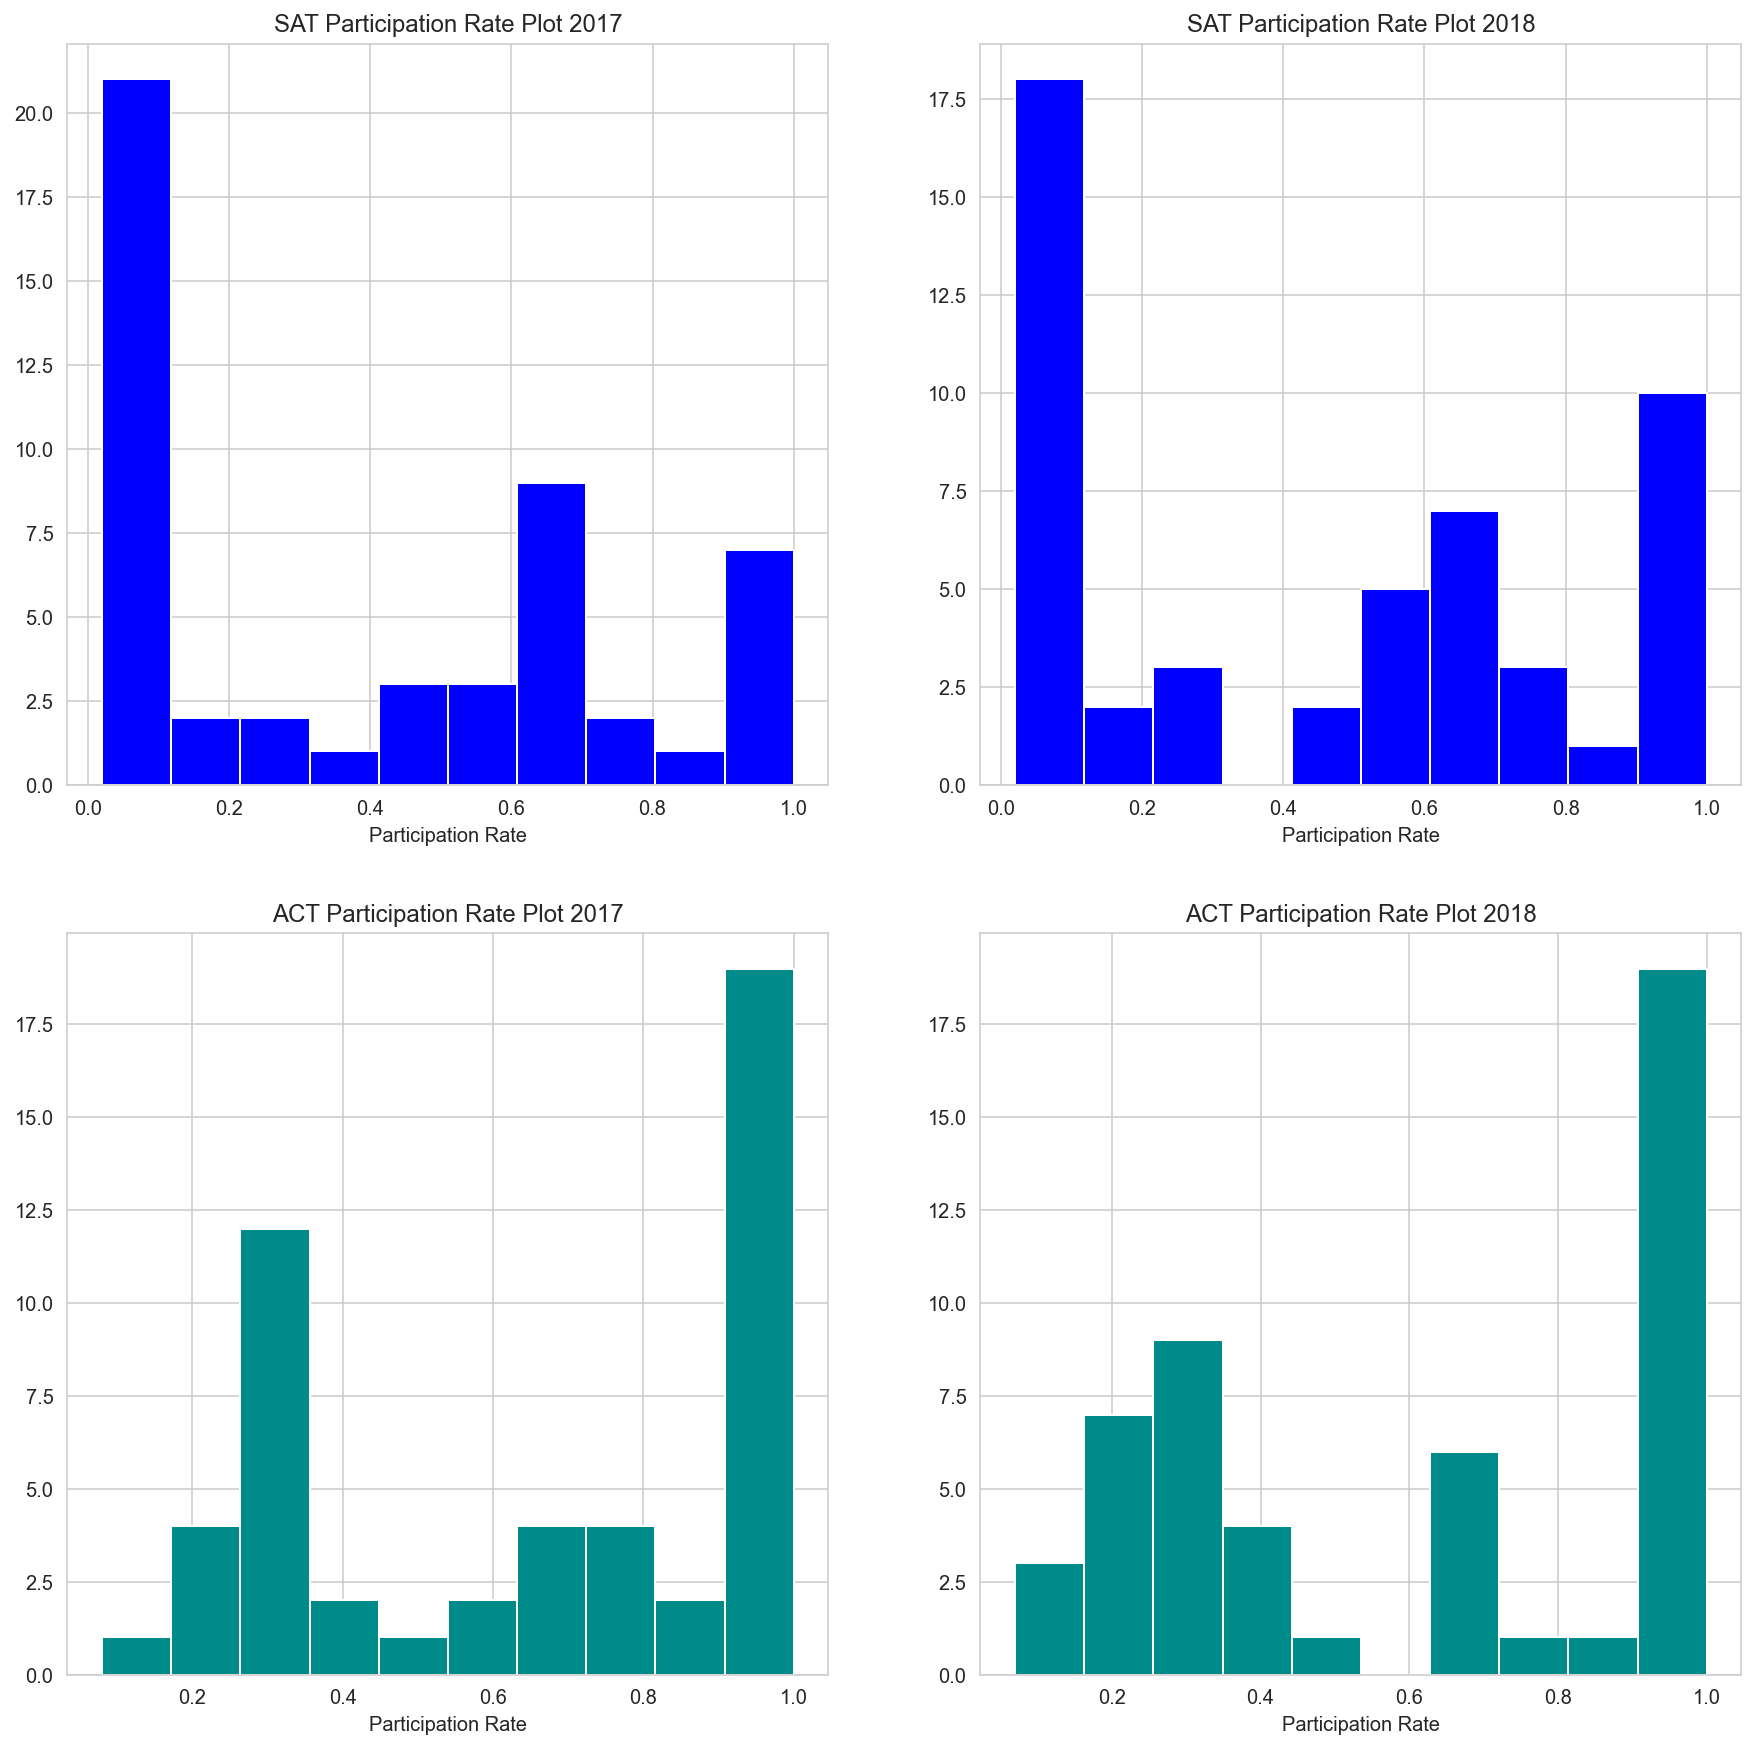

In [72]:
# Participation rates for SAT & ACT
list_of_columns = ['sat_par17','sat_par18','act_par17', 'act_par18']
list_of_titles = ['SAT Participation Rate Plot 2017', 'SAT Participation Rate Plot 2018', 'ACT Participation Rate Plot 2017', 'ACT Participation Rate Plot 2018']
list_of_xlabels = ['Participation Rate', 'Participation Rate', 'Participation Rate', 'Participation Rate']
list_of_colors = ['blue','blue', 'darkcyan', 'darkcyan']
subplot_histograms(final, list_of_columns, list_of_titles, list_of_xlabels, list_of_colors)

### Interpretion of histgrams for Participation rates for SAT & ACT:
From the histgram plots for participation rate, we can observe that from 2017 to 2018, SAT and ACT participation rate do not change dramatically. 
For SAT test, there are still large group of States with low participation rate range (< 10%). The good news is that there is increase for group with 100% participation rate. 

For ACT test, No of States with low paticipation rate (< 10%) incrases while there is almost no change for 100% participation rate group. 


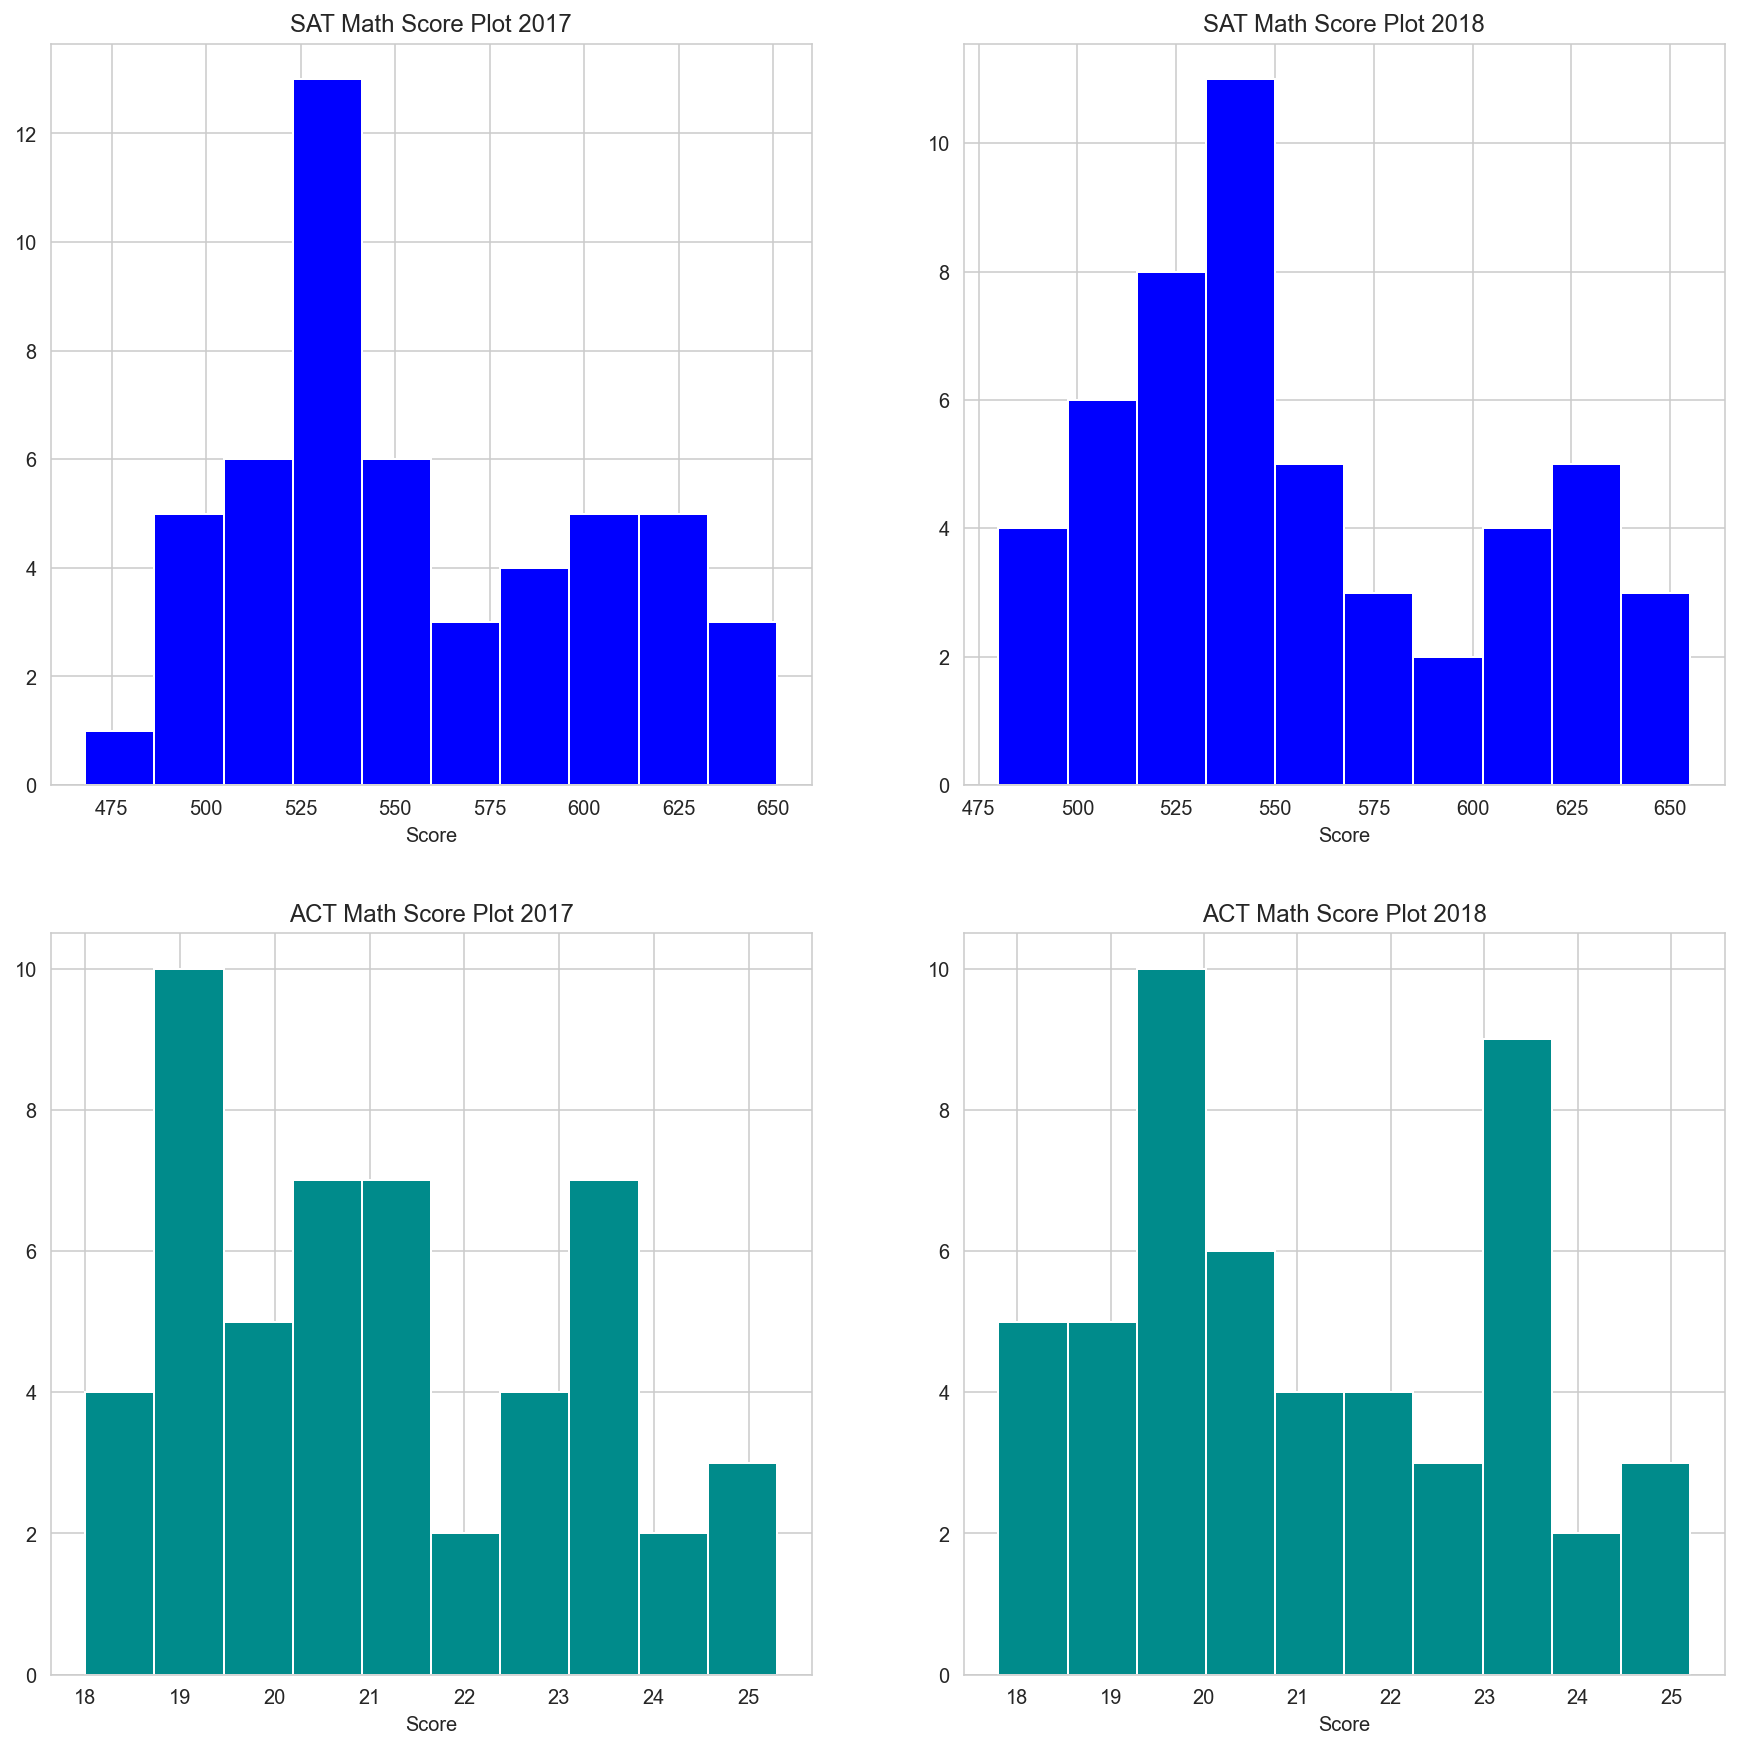

In [73]:
# Math scores for SAT & ACT
list_of_columns = ['sat_math17','sat_math18','act_math17', 'act_math18']
list_of_titles = ['SAT Math Score Plot 2017', 'SAT Math Score Plot 2018', 'ACT Math Score Plot 2017', 'ACT Math Score Plot 2018']
list_of_xlabels = ['Score', 'Score', 'Score', 'Score']
list_of_colors = ['blue','blue', 'darkcyan', 'darkcyan']
subplot_histograms(final, list_of_columns, list_of_titles, list_of_xlabels, list_of_colors)

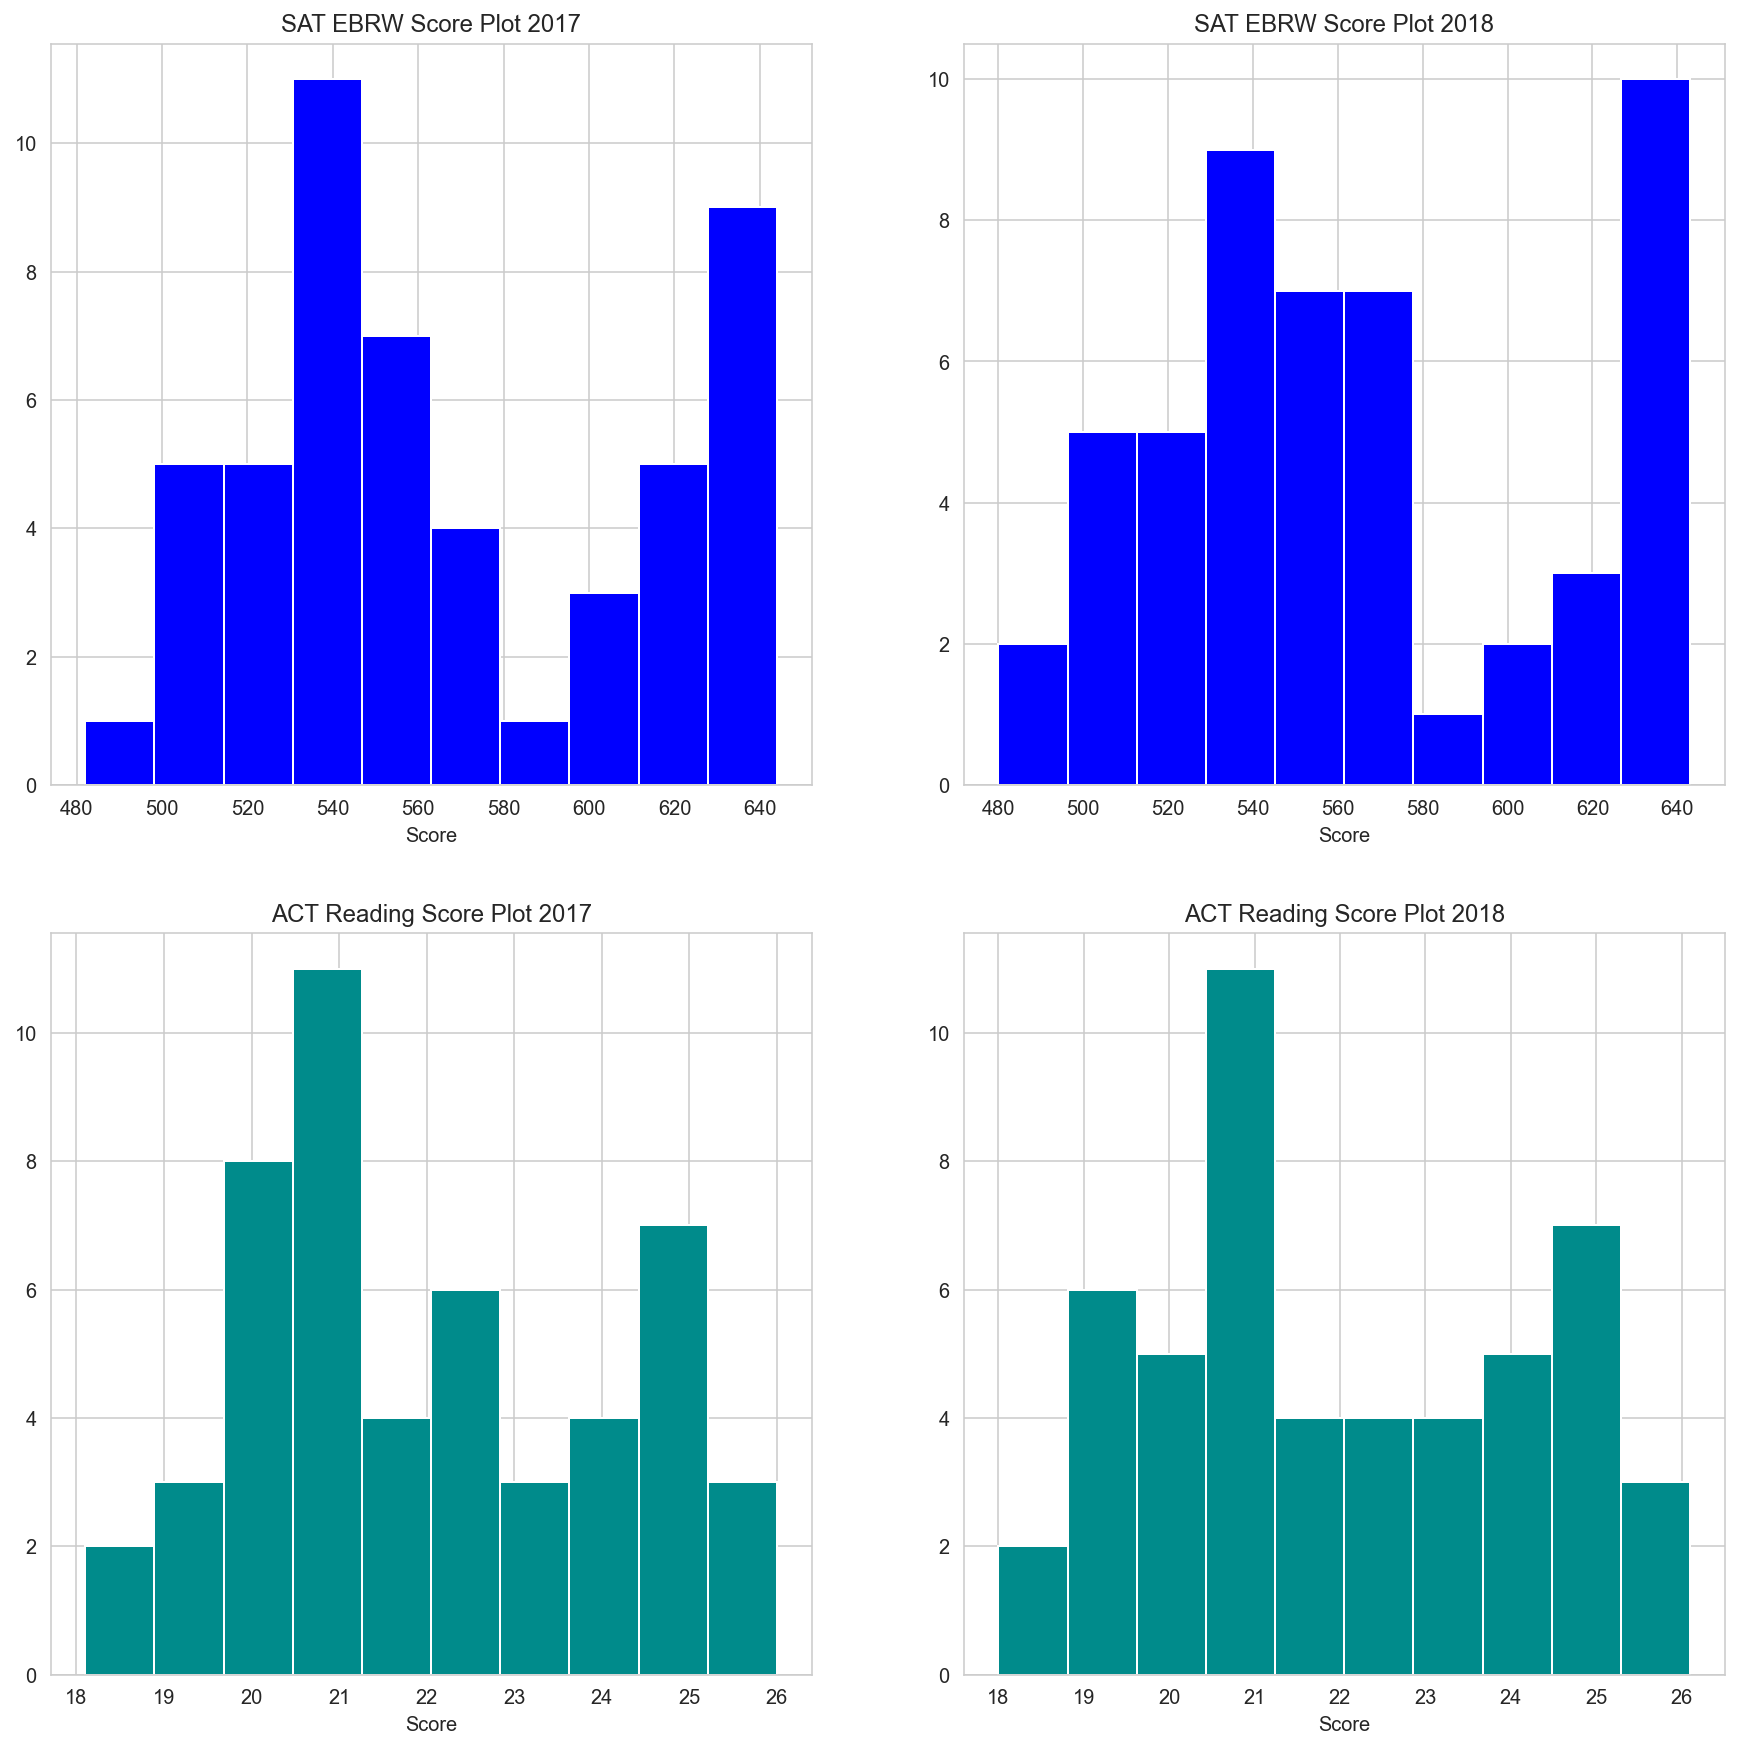

In [74]:
# Math scores for SAT & ACT
list_of_columns = ['sat_ebrw17','sat_ebrw18','act_read17', 'act_read18']
list_of_titles = ['SAT EBRW Score Plot 2017', 'SAT EBRW Score Plot 2018', 'ACT Reading Score Plot 2017', 'ACT Reading Score Plot 2018']
list_of_xlabels = ['Score', 'Score', 'Score', 'Score']
list_of_colors = ['blue','blue', 'darkcyan', 'darkcyan']
subplot_histograms(final, list_of_columns, list_of_titles, list_of_xlabels, list_of_colors)

### Interpretion of histgrams for average score for SAT & ACT:
From the histgram plots for average score of SAT Math/EBRW and ACT Math/reading in 2017 and 2018, we can observe that these average score histogram lots show as bimodel distribution. 

- For SAT 2017 Math, there is peak score around 525, a valley around 575 and followed by second peak between 600 and 625.  
- For SAT 2018 Math, there is peak score around 550, a valley around 600 and followed by second peak around 625.
- For ACT 2017 Math, there is peak score around 19, a valley around 22 and followed by second peak betweeen 23 and 24.
- For ACT 2018 Math, there is peak score around 19, a valley around 22 and followed by second peak betweeen 23.

- For SAT 2017 EBRW, there is peak score around 540, a valley around 580 and followed by second peak aroung 640.  
- For SAT 2018 EBRW, there is peak score around 540, a valley around 580 and followed by second peak aroung 640.
- For ACT 2017 Reading, there is peak score around 21, a valley around 23 and followed by second peak around 25.
- For ACT 2018 Math, there is peak score around 21, a valley between 22 ~23 and followed by second peak betweeen 25.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [75]:
# define function for scatter subplot

def scatter_subplot(Dataframe, list_of_X, list_of_Y, list_of_titles, list_of_xlabels, list_of_ylabels, list_of_colors, list_of_makers): 
    nrows = int(np.ceil(len(list_of_Y)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    fig.set_figheight(nrows*8)
    fig.set_figwidth(15)
    for i, column in enumerate(list_of_Y): # Gives us an index value to get into all our lists
        #list_of_makers can be set from ["." , "," , "o" , "v" , "^" , "<", ">"]
        ax[i].scatter(Dataframe[list_of_X[i]], Dataframe[column], color = list_of_colors[i], marker = list_of_makers[i]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_ylabel(list_of_ylabels[i])

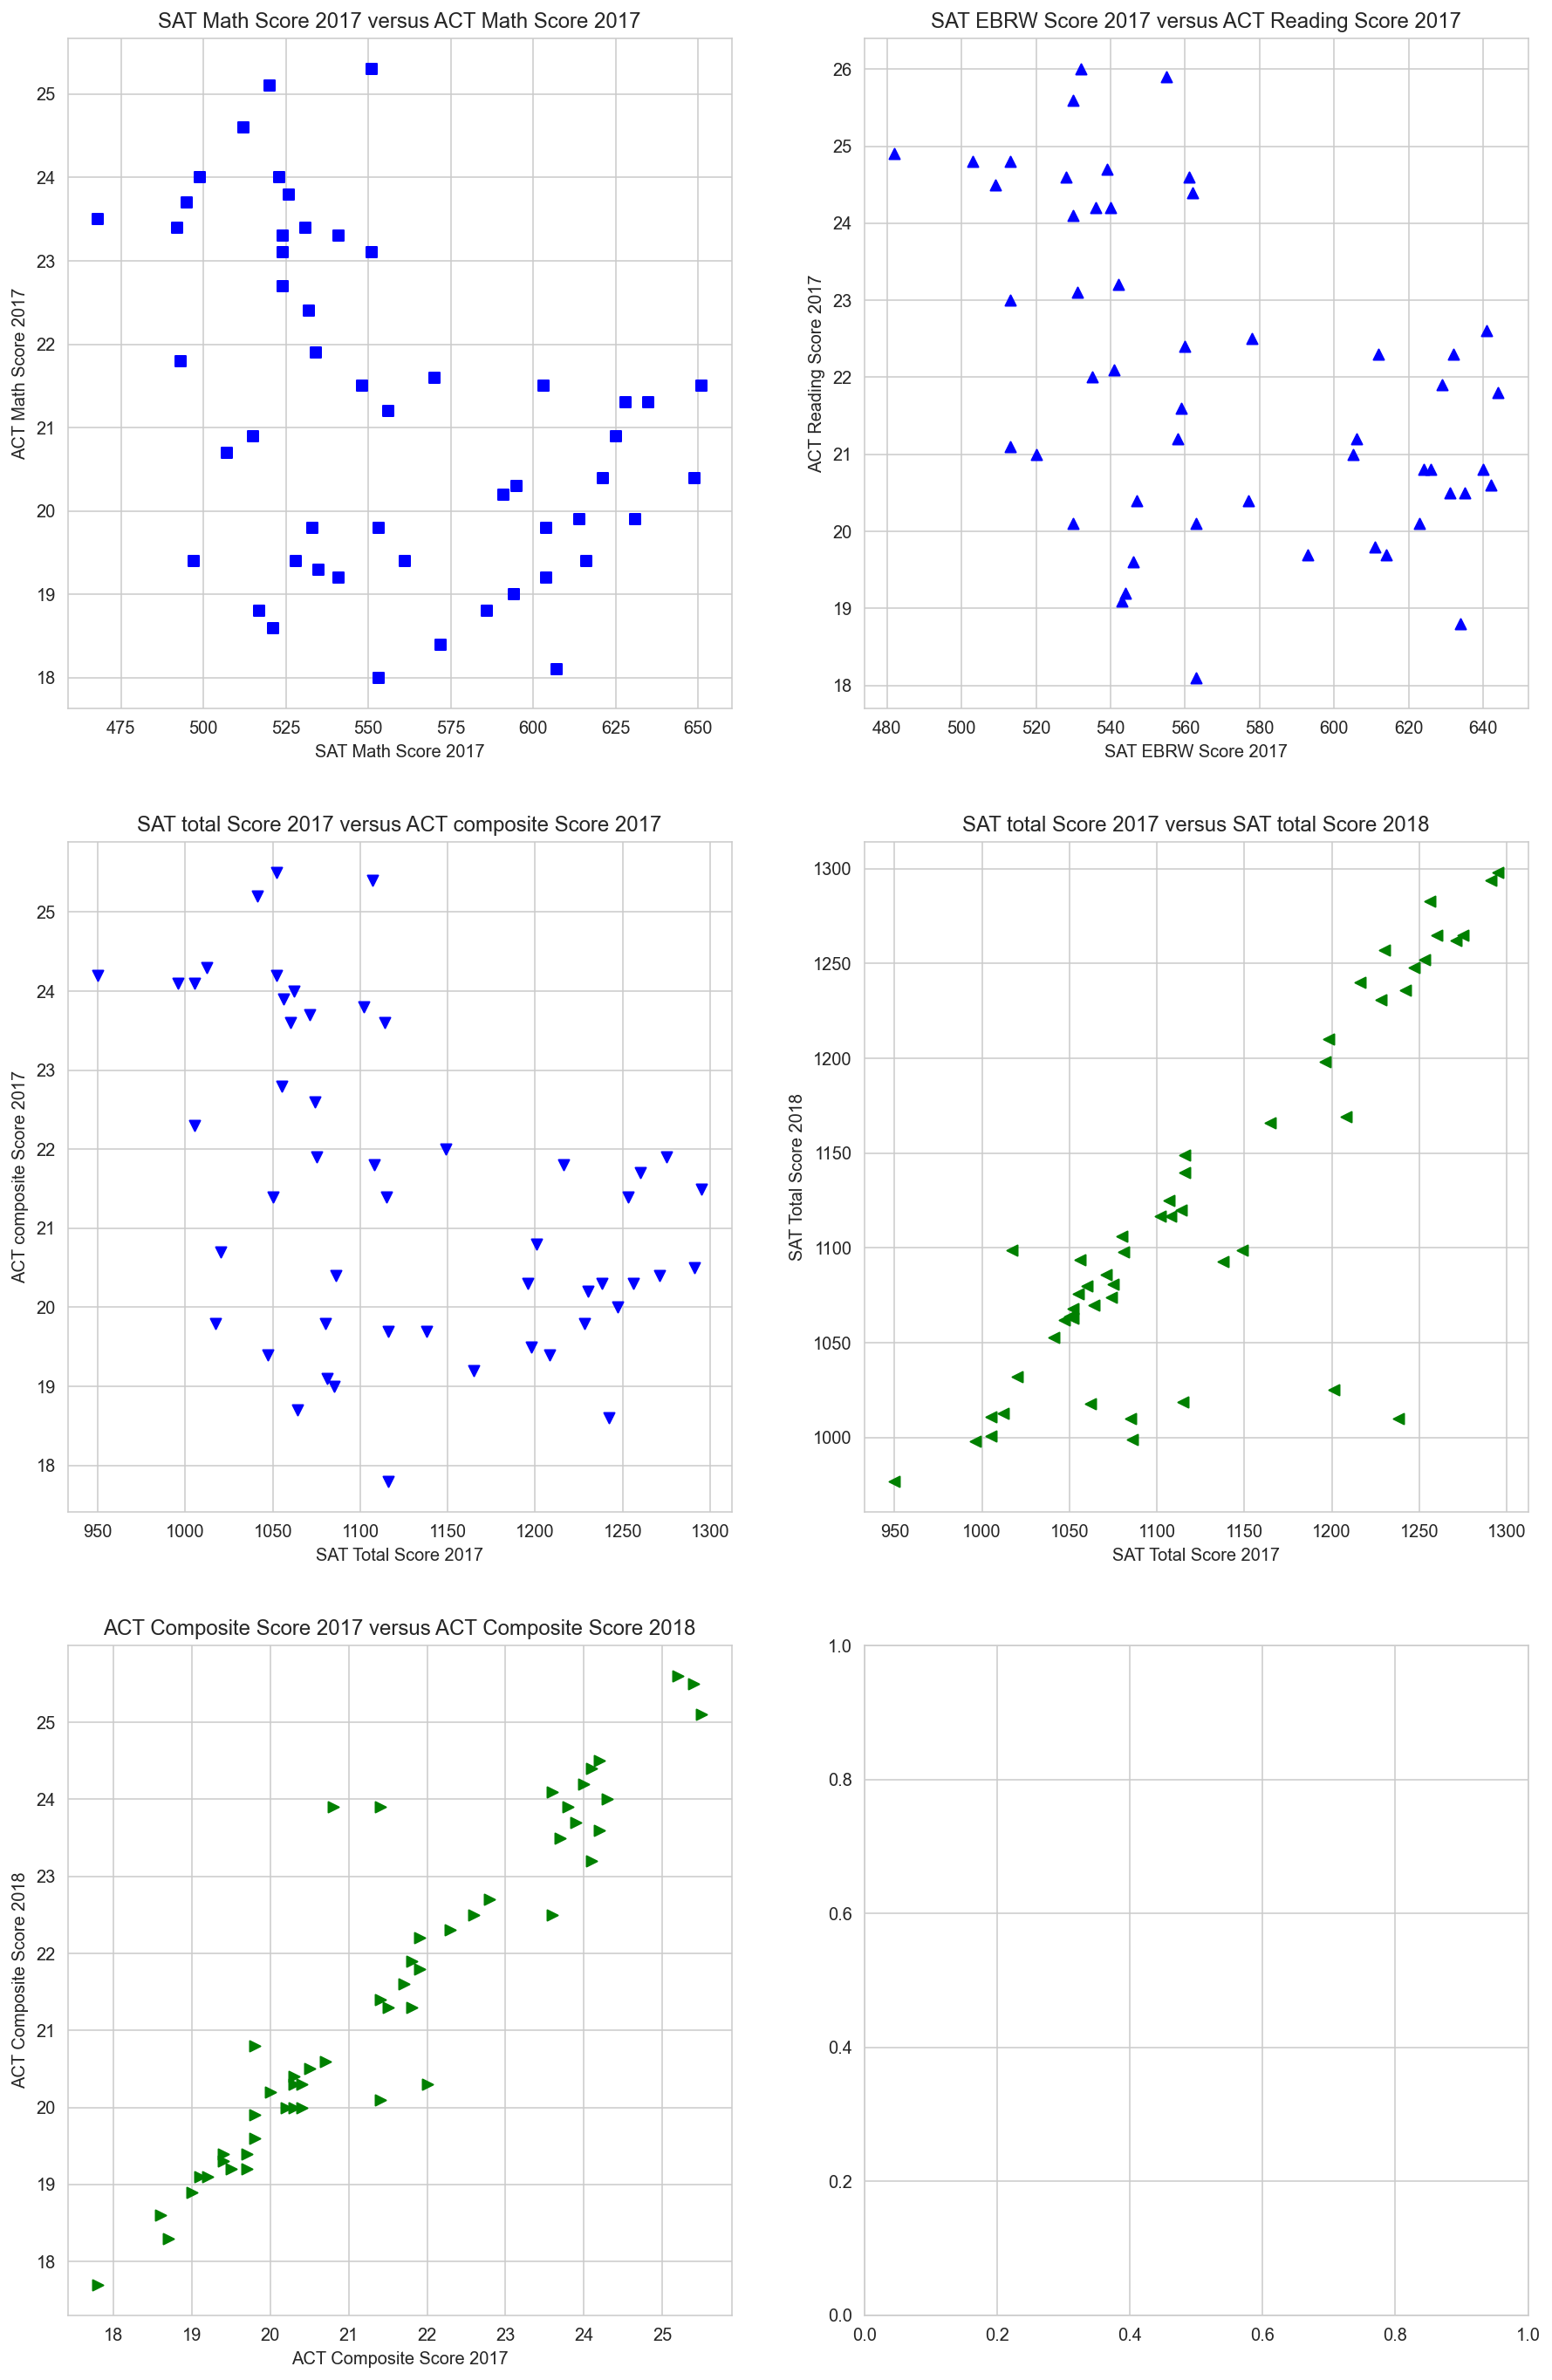

In [76]:
list_of_titles = ["SAT Math Score 2017 versus ACT Math Score 2017", "SAT EBRW Score 2017 versus ACT Reading Score 2017", "SAT total Score 2017 versus ACT composite Score 2017", "SAT total Score 2017 versus SAT total Score 2018", "ACT Composite Score 2017 versus ACT Composite Score 2018"] 
list_of_ylabels = ["ACT Math Score 2017", "ACT Reading Score 2017", "ACT composite Score 2017", "SAT Total Score 2018", "ACT Composite Score 2018"]
list_of_xlabels = ["SAT Math Score 2017", "SAT EBRW Score 2017", "SAT Total Score 2017", "SAT Total Score 2017", "ACT Composite Score 2017"]
list_of_colors = ['blue', 'blue', 'blue', 'green', 'green']
list_of_X = ['sat_math17', 'sat_ebrw17', 'sat_total17', 'sat_total17', 'act_compo17']
list_of_Y = ['act_math17', 'act_read17', 'act_compo17', 'sat_total18', 'act_compo18']
list_of_makers = [",", "^", "v", "<", ">"]
scatter_subplot(final, list_of_X, list_of_Y, list_of_titles, list_of_xlabels, list_of_ylabels, list_of_colors,list_of_makers)

### Interpretion of scatter plots:
From the scatter plots, we can observe that the plots for "SAT Math Score 2017 versus ACT Math Score 2017", "SAT EBRW Score 2017 versus ACT Reading Score 2017" and "SAT total Score 2017 versus ACT composite Score 2017" are similar and shows almost no correlation.  

From scatter plots of "SAT total Score 2017 versus SAT total Score 2018" and "ACT Composite Score 2017 versus ACT Composite Score 2018", these two plots shows highly positive correlation. However, there are more outliers in plot "SAT total Score 2017 versus SAT total Score 2018" under the best fit line. 

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

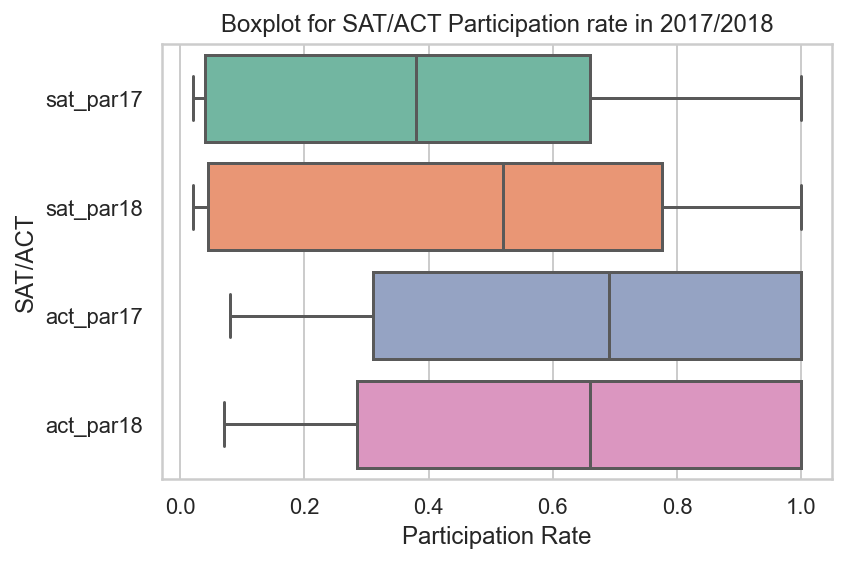

In [90]:
# Boxplot for SAT/ACT Participation rate in 2017/2018
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=final[['sat_par17','sat_par18', 'act_par17', 'act_par18']], palette = "Set2", orient = "h").set(title = "Boxplot for SAT/ACT Participation rate in 2017/2018", xlabel = 'Participation Rate', ylabel = 'SAT/ACT')

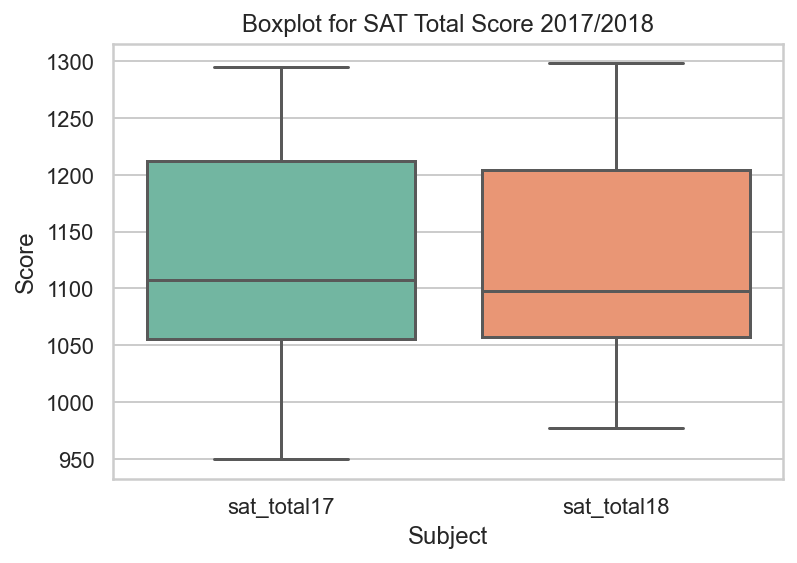

In [78]:
#Boxplot for SAT Total score in 2017/2018
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=final[['sat_total17','sat_total18']], palette = "Set2").set(title = "Boxplot for SAT Total Score 2017/2018", xlabel = 'Subject', ylabel = 'Score')

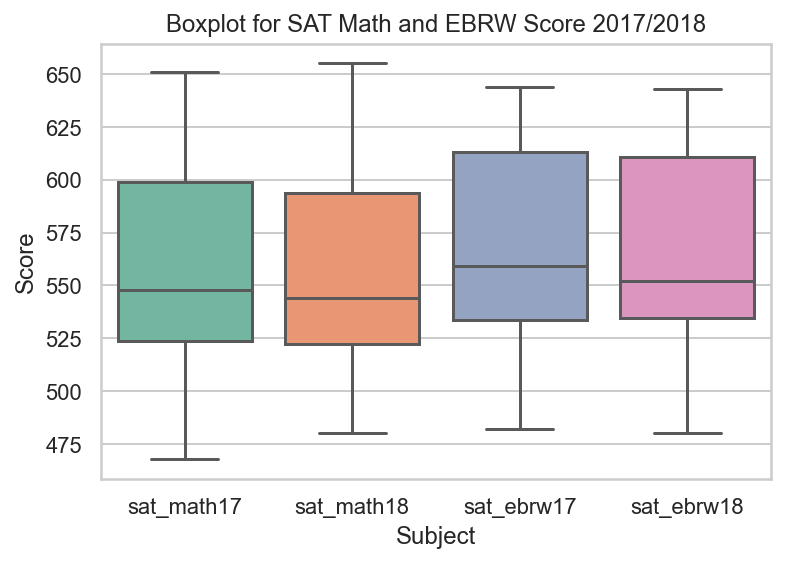

In [79]:
# Boxplot for SAT subject score in 2017/2018
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=final[['sat_math17','sat_math18', 'sat_ebrw17','sat_ebrw18']], palette="Set2").set(title = "Boxplot for SAT Math and EBRW Score 2017/2018", xlabel = 'Subject', ylabel = 'Score')

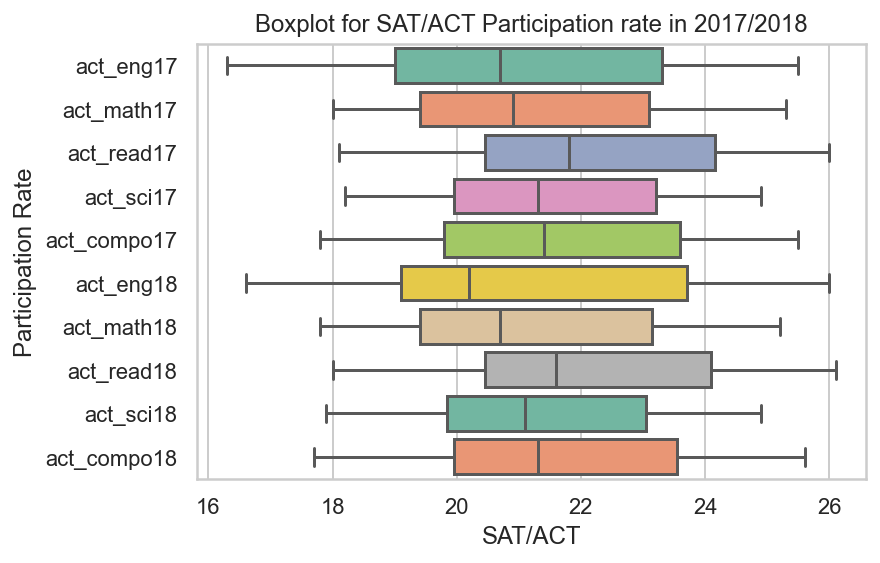

In [80]:
# Boxplot for SAT/ACT Participation rate in 2017/2018
# if use vertical boxplot, xlabel will overlap. 
sns.set_theme(style="whitegrid")

data = final[['act_eng17','act_math17', 'act_read17', 'act_sci17','act_compo17', 'act_eng18','act_math18', 'act_read18', 'act_sci18','act_compo18']]
ax = sns.boxplot(data=data, orient="h", palette = "Set2").set(title = "Boxplot for SAT/ACT Participation rate in 2017/2018", xlabel = 'SAT/ACT', ylabel = 'Participation Rate')

### Interpretion of Boxplots:
From the Boxplots, we can observe that the distribution of ACT participation rate is centered significantly higher than that of the SAT. 

The average scores of SAT and ACT do not have significant change in 2017 and 2018. 

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

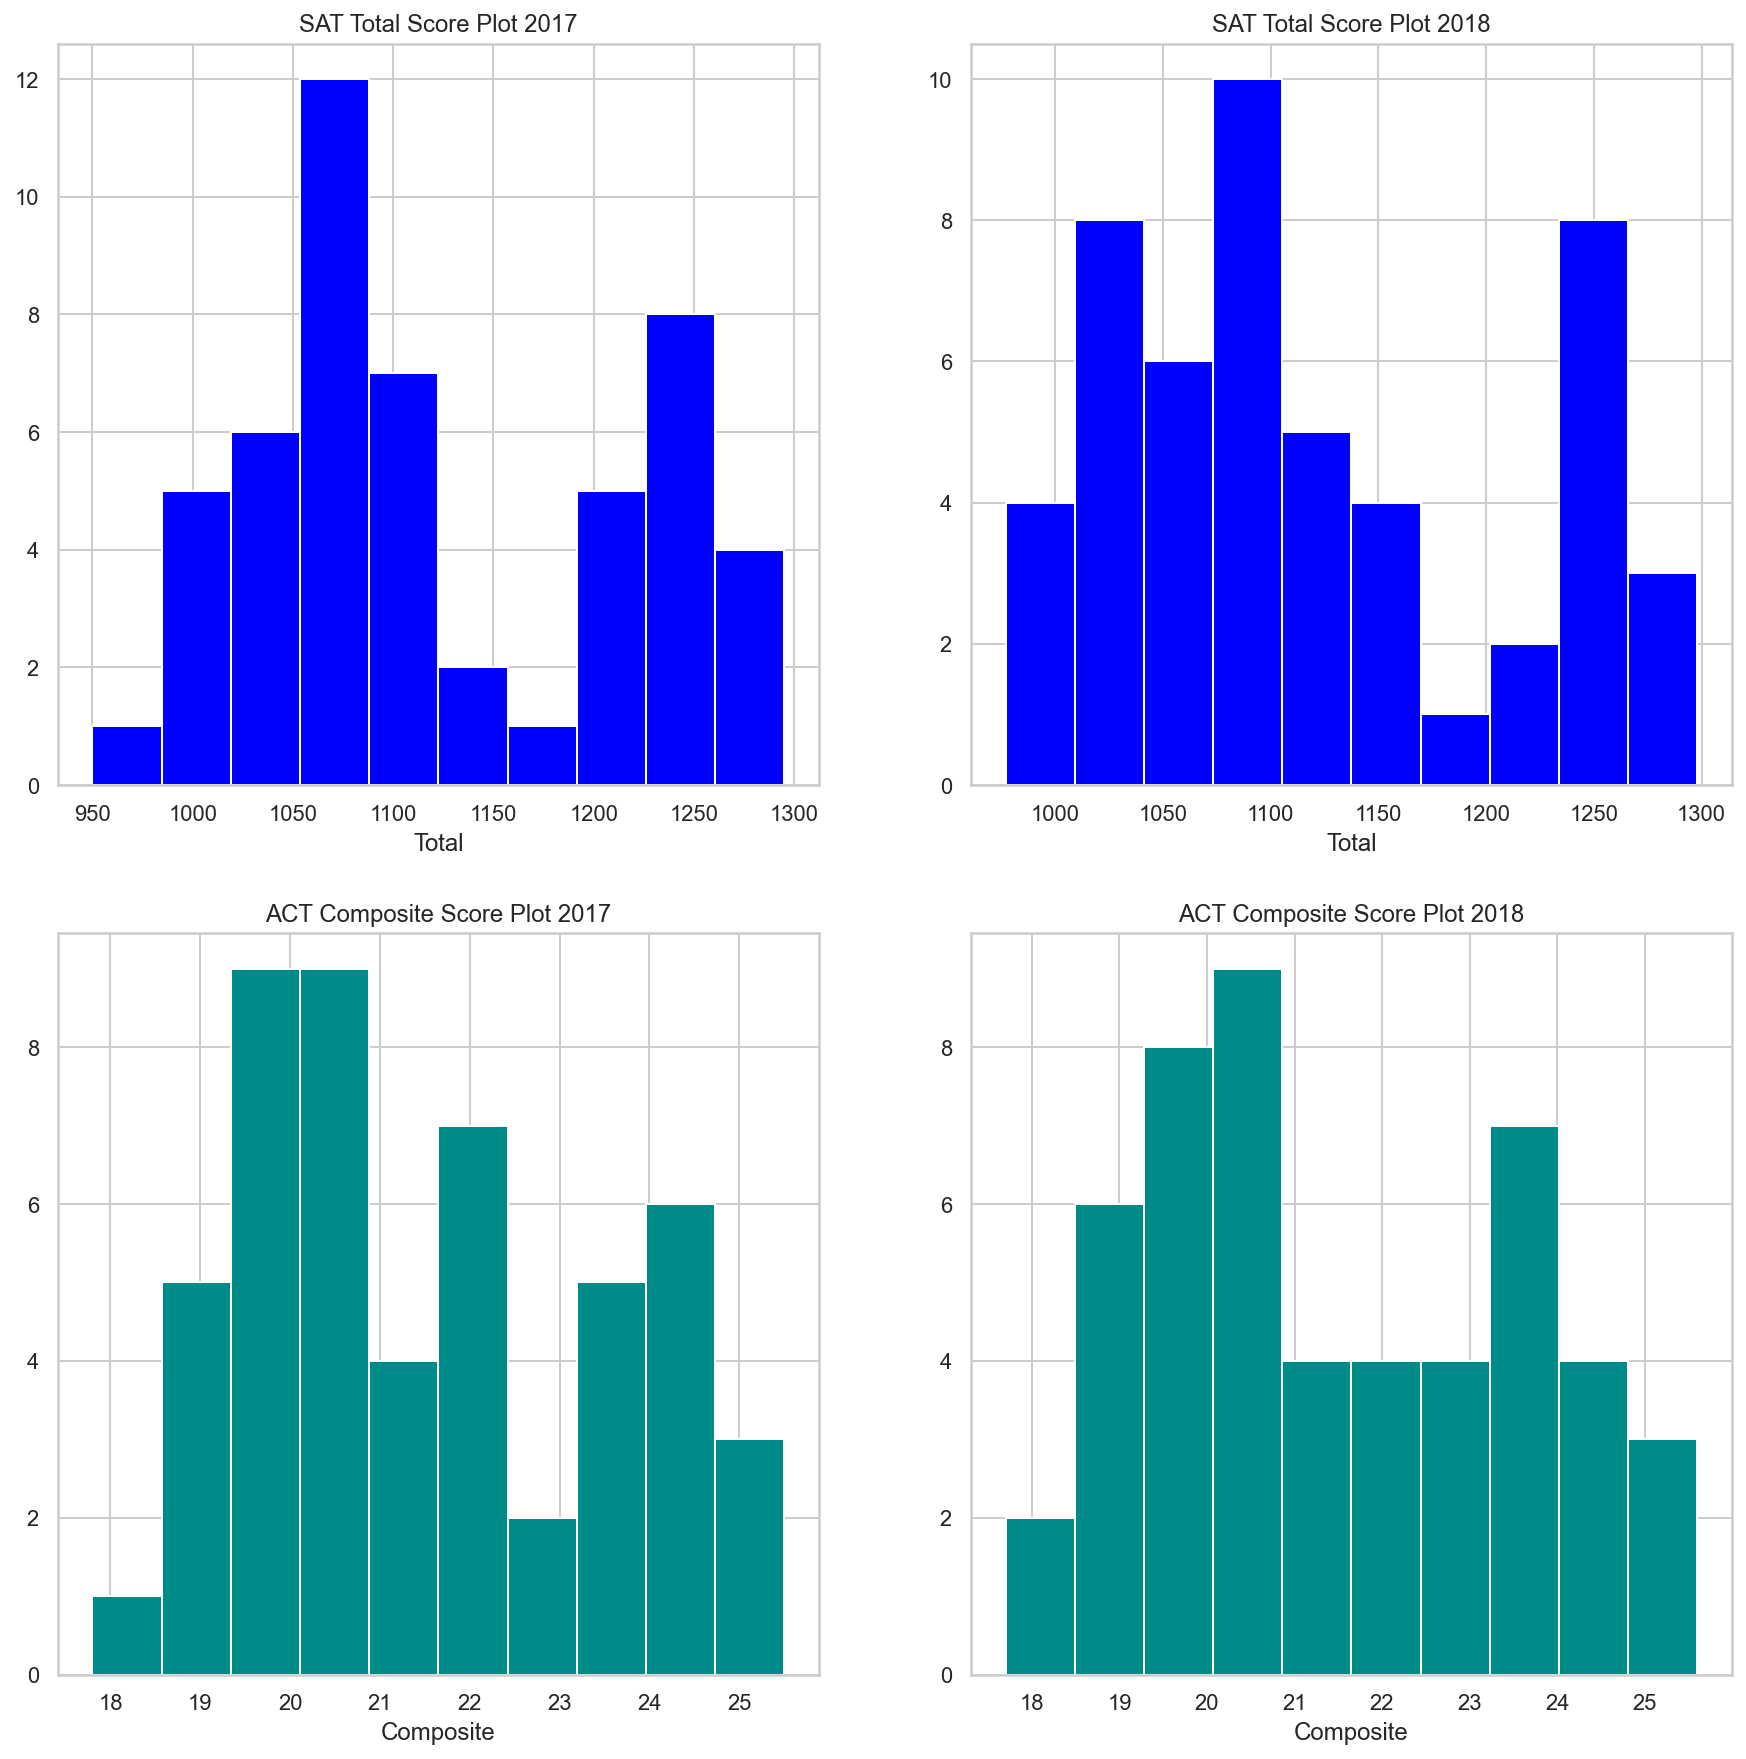

In [81]:
# Total/composite score for SAT & ACT

list_of_columns = ['sat_total17','sat_total18','act_compo17', 'act_compo18']
list_of_titles = ['SAT Total Score Plot 2017', 'SAT Total Score Plot 2018', 'ACT Composite Score Plot 2017', 'ACT Composite Score Plot 2018']
list_of_xlabels = ['Total', 'Total', 'Composite', 'Composite']
list_of_colors = ['blue','blue', 'darkcyan', 'darkcyan']
subplot_histograms(final, list_of_columns, list_of_titles, list_of_xlabels, list_of_colors)

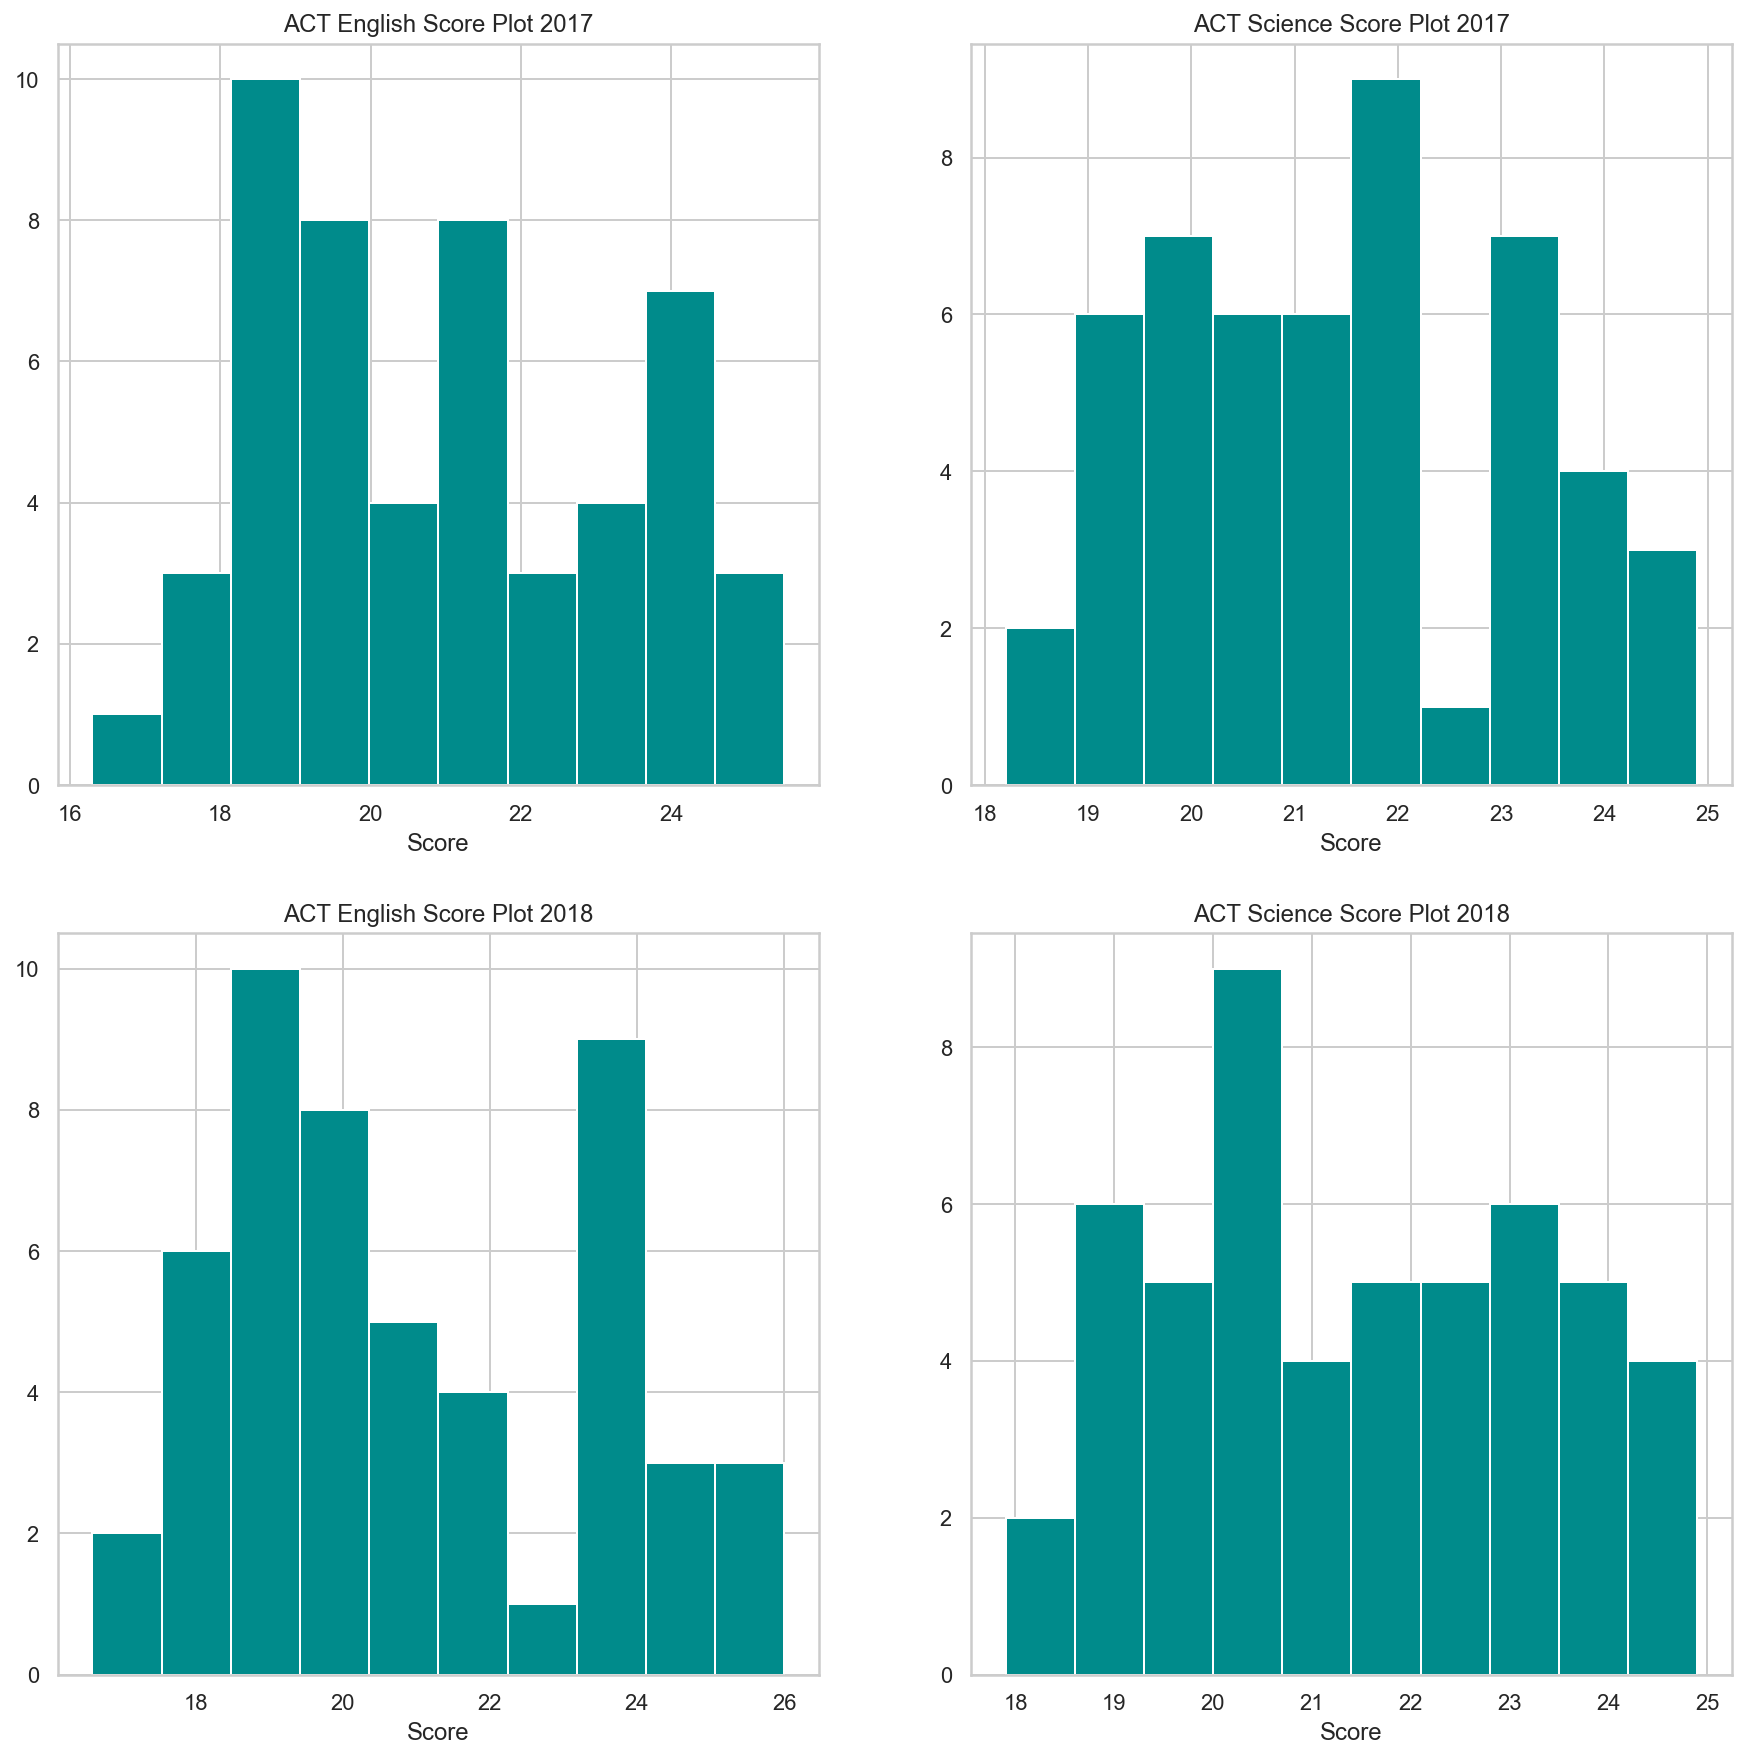

In [82]:
# English/Science score for ACT

list_of_columns = ['act_eng17', 'act_sci17','act_eng18', 'act_sci18']
list_of_titles = ['ACT English Score Plot 2017', 'ACT Science Score Plot 2017', 'ACT English Score Plot 2018', 'ACT Science Score Plot 2018']
list_of_xlabels = ['Score', 'Score', 'Score', 'Score']
list_of_colors = ['darkcyan','darkcyan', 'darkcyan', 'darkcyan']
subplot_histograms(final, list_of_columns, list_of_titles, list_of_xlabels, list_of_colors)

### Interpretion of histgrams for average score for SAT & ACT:
From the histgram plots for average score of SAT total and ACT Composite/English/Science in 2017 and 2018, we can observe that these average score histogram lots show as bimodel distribution. 

- For SAT 2017 Total, there is peak score around 1050, a valley around 1150 and followed by second peak around 1250.  
- For SAT 2018 Total, there is peak score around 1100, a valley around 1200 and followed by second peak around 1250.
- For ACT 2017 Composit, there is peak score around 20, a valley around 23 and followed by second peak around 24.
- For ACT 2018 Composit, there is peak score around 20, a valley around 21~23 and followed by second peak betweeen 24.

- For ACT 2017 English, there is peak score around 18, a valley around 22 and followed by second peak aroung 24.  
- For ACT 2017 Science, there is peak score around 22, a valley around 22~23 and followed by second peak aroung 23.
- For ACT 2018 English, there is peak score around 19, a valley around 22 and followed by second peak around 24.
- For ACT 2018 Science, there is peak score around 20, a valley around 21 and followed by second peak betweeen 23.

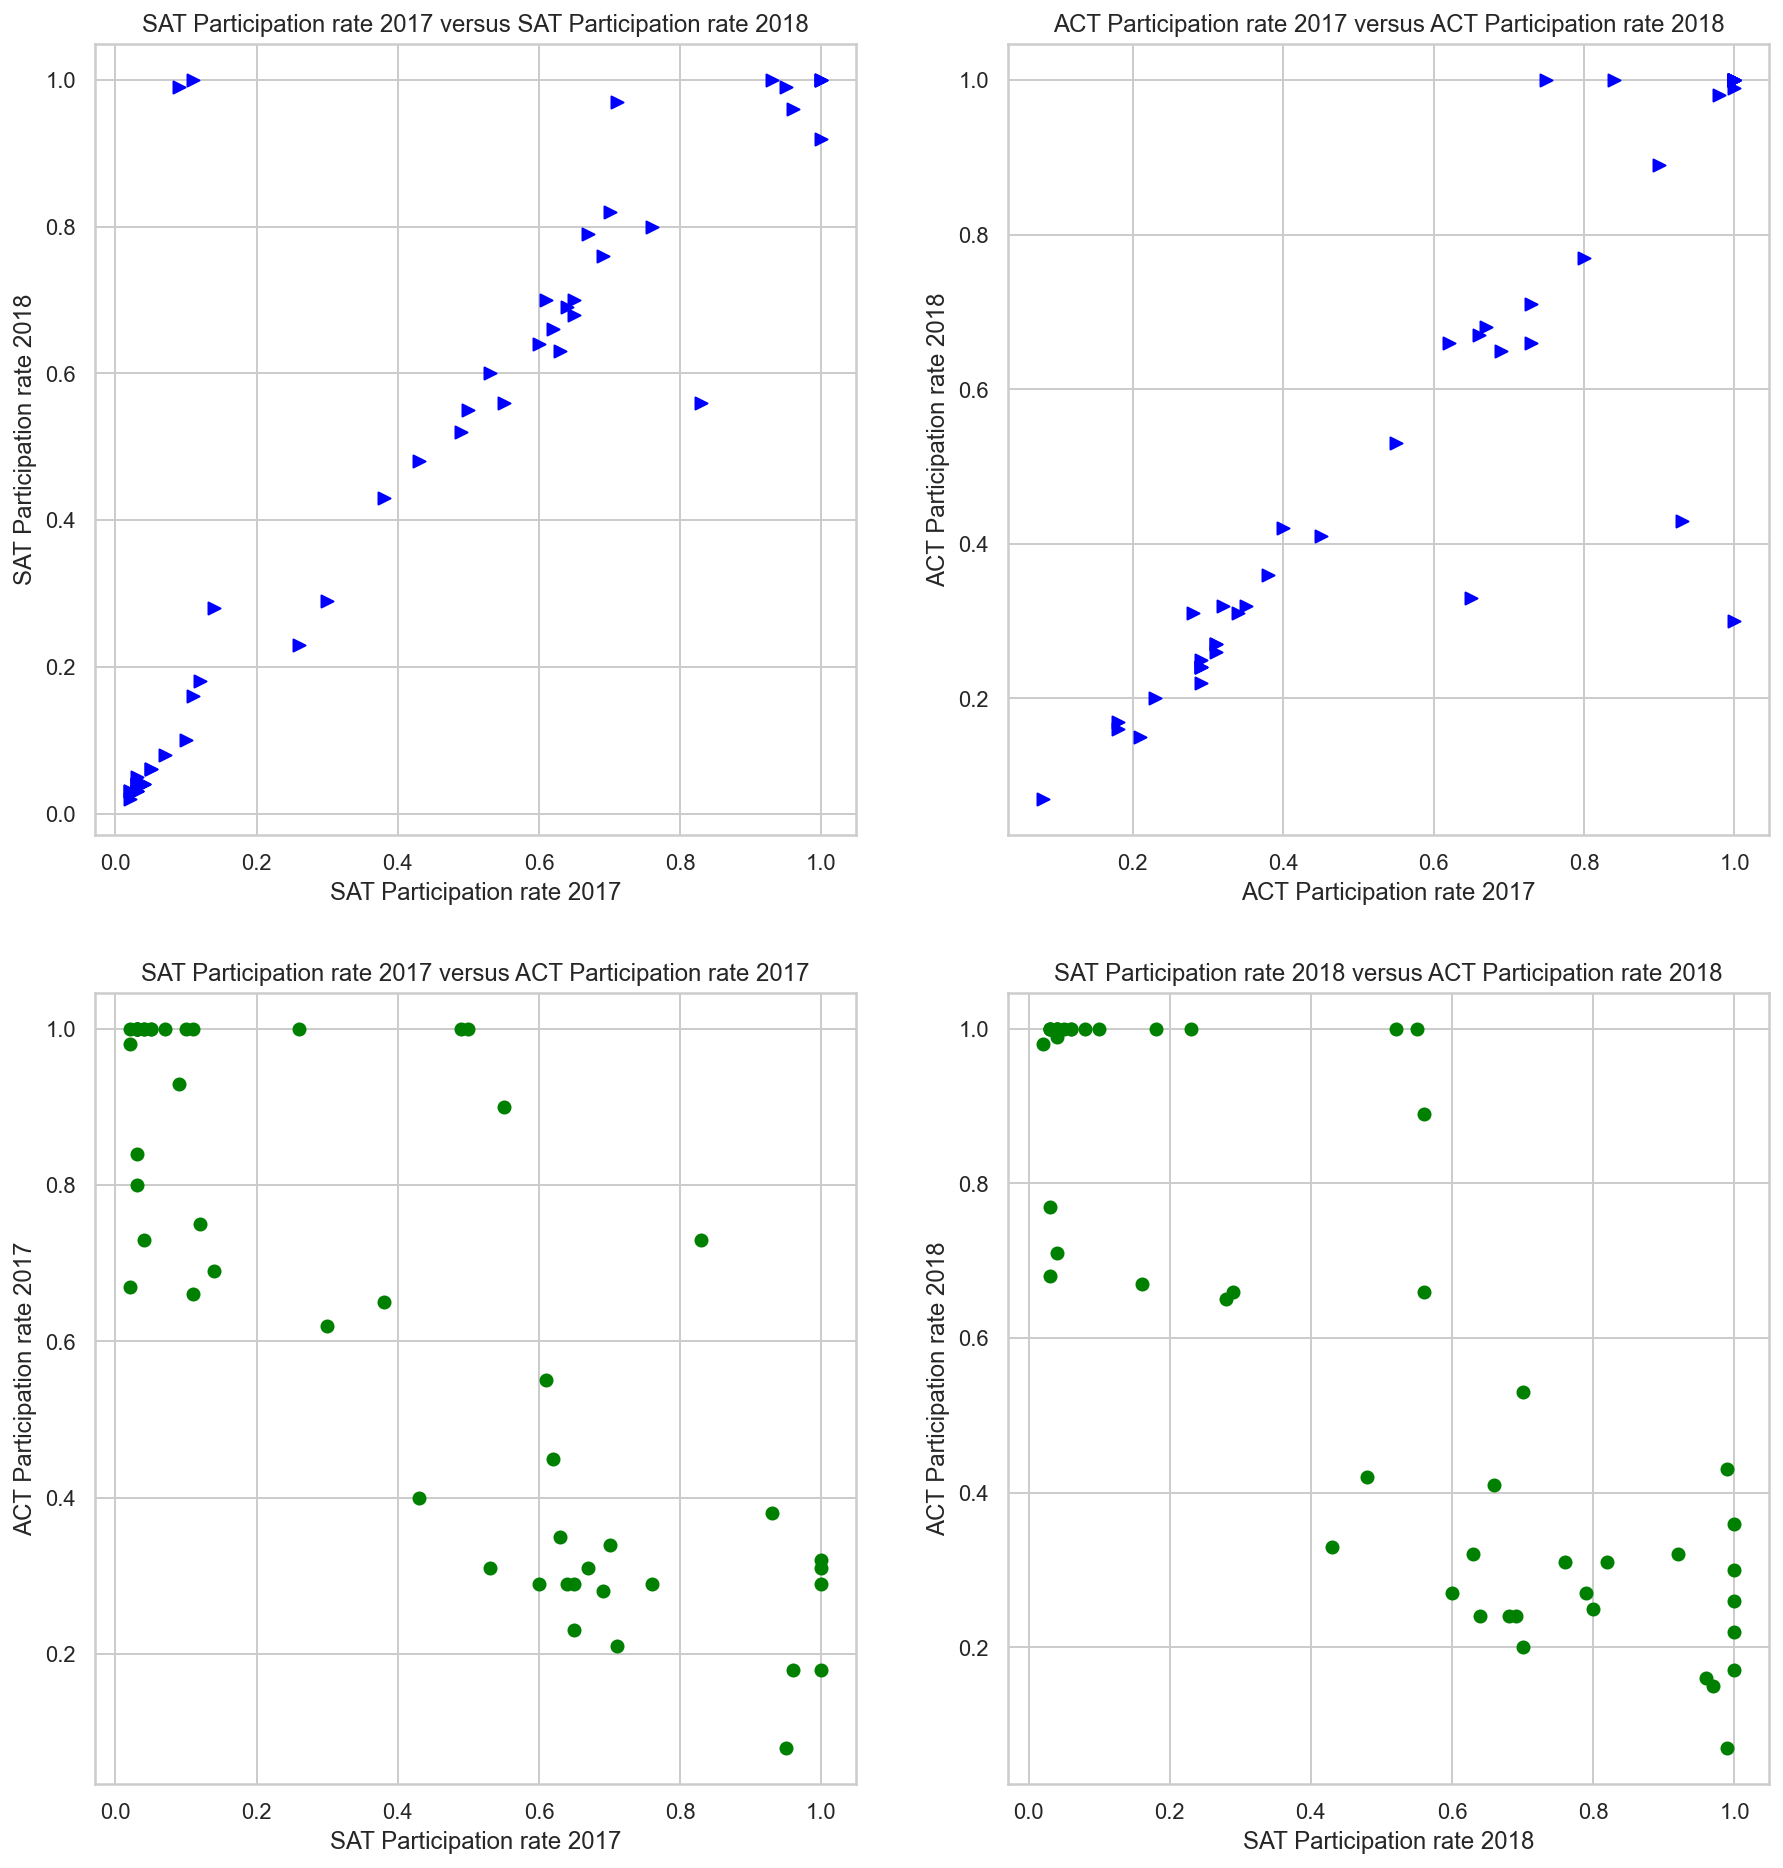

In [83]:
list_of_titles = ["SAT Participation rate 2017 versus SAT Participation rate 2018","ACT Participation rate 2017 versus ACT Participation rate 2018", "SAT Participation rate 2017 versus ACT Participation rate 2017","SAT Participation rate 2018 versus ACT Participation rate 2018"] 
list_of_ylabels = ["SAT Participation rate 2018","ACT Participation rate 2018", "ACT Participation rate 2017","ACT Participation rate 2018"]
list_of_xlabels = ["SAT Participation rate 2017","ACT Participation rate 2017", "SAT Participation rate 2017","SAT Participation rate 2018"]
list_of_colors = ['blue', 'blue','green','green']
list_of_X = ['sat_par17', 'act_par17','sat_par17', 'sat_par18']
list_of_Y = ['sat_par18', 'act_par18','act_par17', 'act_par18']
list_of_makers = [">", ">", "o", "o"]
scatter_subplot(final, list_of_X, list_of_Y, list_of_titles, list_of_xlabels, list_of_ylabels, list_of_colors,list_of_makers)

### Interpretion of extra scatter plots:

Scatter plots of "SAT Participation rate 2017 versus SAT Participation rate 2018","ACT Participation rate 2017 versus ACT Participation rate 2018" show highly positive correlation, except some outlier for several States that whose SAT particpation rate increase significantly in 2018 and ACT participation rate decreased by 50~70%, like Colorado/Illinois.

Scatter plots of "SAT participation rate 2017 versus ACT participation rate 2017" and "SAT participation rate 2018 versus ACT participation rate 2018" show obviously negative correlation. However, there are more outliers in the lower end and upper end. 

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

- From the choropleth maps for SAT/ACT participation rate in 2017/2018, we can see that most States in the middle aera in U.S take ACT test rather than SAT test.

<img src="../data/image/SAT_participationRate_2017.png">
<img src="../data/image/SAT_participationRate_2018.png">
<img src="../data/image/ACT_participationRate_2017.png">
<img src="../data/image/ACT_participationRate_2018.png">

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [85]:
final.agg(['mean', 'median', 'std','skew']).T

,mean,median,std,skew
sat_par17,0.398039,0.38,0.352766,0.346450
sat_ebrw17,569.117647,559.00,45.666901,0.272693
sat_math17,556.882353,548.00,47.121395,0.365040
sat_total17,1126.098039,1107.00,92.494812,0.310903
act_par17,0.652549,0.69,0.321408,-0.197989
act_eng17,20.931373,20.70,2.353677,0.352660
act_math17,21.182353,20.90,1.981989,0.332683
act_read17,22.013725,21.80,2.067271,0.269366
act_sci17,21.450980,21.30,1.739353,0.218823
act_compo17,21.519608,21.40,2.020695,0.319810


In [86]:
final.agg(pd.Series.mode).T

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
sat_par17,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sat_ebrw17,513.0,530.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sat_math17,524.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sat_total17,1005.0,1052.0,1116.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
act_par17,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
act_eng17,19.0,19.5,21.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
act_math17,19.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
act_read17,20.1,20.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
act_sci17,20.5,20.6,20.9,22.0,23.2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Answers: 

- SAT participation rate 2017

  Mean: 0.398039, median:0.38, mode:0.03,from moode data, the high peak of its distribution may be around 0.03.                
  Mean and median are larger than mode, so we guess its distribution skews to right.                                           
  std = 0.35276 which is a large std deviation regarding to mean. So the distribution is widely spreaded. 
  We also can get this conclusion with positive skewness = 0.346450.                                                           
  From the histgram plot we have done in previous section, the high peak is at interval 0~0.1 which matches with the mode.     
  We also observe its histgram with wide spread and right-skewness. Furthermore, we also find the another two small peaks around 0.6 and 1. 
  
 
- SAT EBRW 2017

  Mean: 569.117647, median:559.00, mode: 513.0 & 530.0. From mode data, we guess the peak of its distribution is around 513.0~ 
  530.0.                                                                                                                       
  Mean and median are larger than mode, so its distribution slightly skews to right.                                     
  We also can get this conclusion from positive skewness = 0.272693.                                                           
  std = 45.666901 which is a small std deviation comparing with mean. So the distribution is not widely spreaded.               
  From the histgram plot we have done in previous section, the high peak is around 540 which almost match with mode.           
  We also observe its histgram with not so wide spread and right-skewness. Furthermore, we also find the another peaks around 640.   
  
  
- SAT Math 2017

  Mean:556.882353 median:548.00, mode: 524. From mode data, we guess the peak of its distribution is around 524.               
  Mean and median are larger than mode, so its distribution slightly skews to right.                                           
  We also can get this conclusion from positive skewness = 0.365040.                                                           
  std = 47.121395 which is a small std deviation comparing with mean. So the distribution is not widely spreaded.               
  From the histgram plot we have done in previous section, the high peak is around 525 which almost match with mode.           
  We also observe its histgram with not so wide spread and right-skewness. Furthermore, we also find the another peaks around 600~625.


- SAT Total 2017 

  Mean:1126.098039 median:1126.098039, mode: 1005.0/1052.0/1116.0. From mode data, we guess the peak of its distribution is around 1005.0~1116.0. Mean and median are larger than mode, so we guess its distribution slightly skews to right.
  We also can get this conclusion from positive skewness = 0.310903.                                                           
  std = 92.494812 which is a small std deviation comparing with mean. So the distribution is not widely spreaded.               
  From the histgram plot we have done in previous section, the high peak is around 1050 which almost matches with mode.        
  We also observe its histgram with not so wide spread and right-skewness. Furthermore, we also find the another peaks around 1250.


- ACT participation rate 2017 

  Mean:0.652549 median:0.652549, mode: 1.0. From mode data, we guess the peak of its distribution is around 1.0.                 
  Mean and median are smaller than mode, so its distribution skews to left.                                                    
  We also can get this conclusion from negative skewness = -0.197989.                                                          
  std = 0.321408 which is a large std deviation comparing with mean. So the distribution is widely spreaded.                   
  From the histgram plot we have done in previous section, the high peak is around 1.0 which almost matches with mode.         
  We also observe its histgram with wide spread and left-skewness. Furthermore, we also find the another peak around 0.3.


- ACT English 2017

  Mean:20.931373 median:20.70, mode:19.0/19.5/21.2. From mode data, we guess the peak of its distribution is around 19.0~21.2. 
  Mean and median are comparable with mode, so we guess its distribution may not skew.                                         
  However, the positive skewness = 0.352660 indicates the its distribution skews to right. We may refer to its histgram plot to see actual shape.                                                                                                               
  std = 2.353677 which is a small std deviation comparing with mean. So the distribution is not widely spreaded.               
  From the histgram plot we have done in previous section, the high peak is around 19 which almost matches with mode.           
  We also observe its histgram with not so wide spread and right-skewness. Furthermore, we also find the another peaks around 24.
  
  
- ACT Math 2017 

  Mean:21.182353 median:20.90, mode:19.4. From mode data, we guess the peak of its distribution is around 19.4. 
  Mean and median are comparable with mode, so we guess its distribution may not skew.
  However, the positive skewness = 0.332683 indicates the its distribution skews to right. We may refer to its histgram plot to see actual shape.  
  std = 1.981989 which is a small std deviation comparing with mean. So the distribution is not so widely spreaded. 
  From the histgram plot we have done in previous section, the high peak is around 19 which almost matches with mode.
  We also observe its histgram with not so wide spread and right-skewness. Furthermore, we also find the another peaks around 23.


- ACT Reading 2017

  Mean:22.013725 median:21.80, mode:20.1/20.8. From mode data, we guess the peak of its distribution is around 20.1~20.8. 
  Mean and median are comparable with mode, so we guess its distribution may not skew.
  However, the positive skewness = 0.269366 indicates the its distribution skews to right. We may refer to its histgram plot to see actual shape.  
  std = 2.067271 which is a small std deviation comparing with mean. So the distribution is not so widely spreaded. 
  From the histgram plot we have done in previous section, the high peak is around 21 which almost match with mode.
  We also observe its histgram with not so wide spread and right-skewness. Furthermore, we also find the another peaks around 25.
  

- ACT Science 2017

  Mean:21.450980 median:21.30, mode:20.5/20.6/20.9/22.0/23.2. From mode data, we guess the peak of its distribution is around 20.5~20.9 or 22.0~23.2. 
  Due to two distinct groups of modes, we can not compare mean/median with them.
  However, the positive skewness =0.218823 indicates the its distribution skews to right. We may refer to its histgram plot to see actual shape.  
  std = 1.739353 which is a small std deviation comparing with mean. So the distribution is not so widely spreaded. 
  From the histgram plot we have done in previous section, the high peak is around 22 which almost matches with mode.
  We also observe its histgram with not so wide spread and right-skewness. Furthermore, we also find the another peaks around 23.
  
  
- ACT Composite 2017

  Mean:21.519608 median:21.40, mode:19.8/20.3/21.4. From mode data, we guess the peak of its distribution is around 19.8~21.4. 
  Mean and median are comparable with mode, so we guess its distribution may not skew.
  However, the positive skewness = 0.319810 indicates the its distribution skews to right. We may refer to its histgram plot to see actual shape.  
  std = 2.020695 which is a small std deviation comparing with mean. So the distribution is not so widely spreaded. 
  From the histgram plot we have done in previous section, the high peak is around 20 which almost matches with mode.
  We also observe its histgram with not so wide spread and right-skewness. Furthermore, we also find the another peaks around 24.



- SAT participation rate 2018 

  Mean: 0.457451, median:0.52, mode:0.03/0.04,from mode data, we guess that the high peak of its distribution is around 0.03-0.04. Mean and median are larger than mode, so its distribution skews to right. 
  We also can get this conclusion with positive skewness = 0.136228. 
  std = 0.373143 which is a large std deviation regarding to mean. So the distribution is widely spreaded. 
  From the histgram plot we have done in previous section, the high peak is at interval 0~0.1 which matches with the mode= 0.03.
  We also observe its histgram with wide spread and right-skewness. Furthermore, we also find the another two small peaks around 
  0.6 and 1. 
  
 
- SAT EBRW 2018 

  Mean: 563.686275, median:552.00, mode: 513.0/547.0/633.0. From mode data, we guess the peak of its distribution may be around 513.0~547.0 or around 633.0. Due to two distinct groups of modes, we can not compare mean/median with them.
  We guess its distribution skews to right due to a positive skewness = 0.530407.
  std = 447.502627 which is a small std deviation comparing with mean. So the distribution is not widely spreaded. 
  From the histgram plot we have done in previous section, its peak is around 540 which almost matches with mode.
  We also observe its histgram with not so wide spread and right-skewness. Furthermore, we also find the another peak around 640 which also matches one of its mode.   


  
- SAT Math 2018

  Mean:556.235294 median:544.00, mode: 506.0/530.0/547.0/618.0/631.0. From mode data, we guess the peak of its distribution is around 506.0-547.0 or 618.0~631.0.
  Due to two distinct groups of modes, we can not compare mean/median with them. 
  We guess its distribution skews to right due to a positive skewness = 0.530407. 
  std = 47.772623 which is a small std deviation comparing with mean. So the distribution is not widely spreaded. 
  From the histgram plot we have done in previous section, the high peak is around 540 which almost matches with mode.
  We also observe its histgram with not so wide spread and right-skewness. Furthermore, we also find the another peaks around 625 which also mtaches one of its mode.



- SAT Total 2018

  Mean:1126.098039 median:1126.098039, mode: 1010.0/1099.0/1117.0/1265.0. From mode data, we guess the peak of its distribution is around 1010.0~1117.0 or 1265.0. 
  Due to two distinct groups of modes, we can not compare mean/median with them. 
  We guess its distribution skews to right due to a positive skewness = 0.466432.
  std = 94.155083 which is a small std deviation comparing with mean. So the distribution is not widely spreaded. 
  From the histgram plot we have done in previous section, the high peak is around 1100 which almost match with mode.
  We also observe its histgram with not so wide spread and right-skewness. Furthermore, we also find the another peaks around 1250.



- ACT participation rate 2018

  Mean:0.616471 median:0.66, mode: 1.0. From mode data, we guess the peak of its distribution is around 1.0. 
  Mean and median are smaller than mode, so its distribution skews to left.
  We also can get this conclusion from negative skewness = -0.021916. 
  std = 0.340810 which is a large std deviation comparing with mean. So the distribution is widely spreaded. 
  From the histgram plot we have done in previous section, the high peak is around 1.0 which almost match with mode.
  We also observe its histgram with wide spread and left-skewness. Furthermore, we also find the another peaks around 0.3.



- ACT English 2018 

  Mean:20.988235 median:20.20, mode:18.2/19.8/23.8. From mode data, we guess the peak of its distribution is around 18.2~19.8 or 23.8. 
  Due to two distinct groups of modes, we can not compare mean/median with them. 
  However, the positive skewness = 0.371507 indicates the its distribution skews to right. We may refer to its histgram plot to see actual shape.  
  std = 2.446356 which is a small std deviation comparing with mean. So the distribution is not widely spreaded. 
  From the histgram plot we have done in previous section, the high peak is around 22 which does not match its mode.
  We also observe its histgram with not so wide spread and right-skewness. Furthermore, we also find the another peaks around 23 which matches one of its mode.


  
- ACT Math 2018 

  Mean:21.125490 median:20.70, mode:19.7/20.3/23.6. From mode data, we guess the peak of its distribution is around 19.4~20.3 or 23.6.  
  Due to two distinct groups of modes, we can not compare mean/median with them. 
  However, the positive skewness =0.269548 indicates the its distribution skews to right. We may refer to its histgram plot to see actual shape. 
  std = 2.035765 which is a small std deviation comparing with mean. So the distribution is not so widely spreaded. 
  From the histgram plot we have done in previous section, the high peak is around 20 which almost matches with mode.
  We also observe its histgram with not so wide spread and right-skewness. Furthermore, we also find the another peaks around 23 which also matches one of its mode.


- ACT Reading 2018

  Mean:22.015686 median:21.60, mode:24.7. From mode data, we guess the peak of its distribution is around 24.7. 
  Mean and median are smaller than mode, so we guess its distribution may skew to left.
  However, the positive skewness = 0.201361 indicates the its distribution skews to right. We may refer to its histgram plot to see actual shape.  
  std = 2.167245 which is a small std deviation comparing with mean. So the distribution is not so widely spreaded. 
  From the histgram plot we have done in previous section, the high peak is around 22 which does not match with mode.
  We also observe its histgram with not so wide spread and right-skewness. Furthermore, we also find the another peaks around 25 which matches the mode.


- ACT Science 2018

  Mean:21.345098 median:21.10, mode:22.2/23.4/23.5	.From mode data, we guess the peak of its distribution is around 22.2~23.5. 
  Mean and median are smaller than mode, so we guess its distribution may skew to left.
  However, the positive skewness = 0.172383 indicates the its distribution skews to right. We may refer to its histgram plot to see actual shape. 
  std = 1.870114 which is a small std deviation comparing with mean. So the distribution is not so widely spreaded. 
  From the histgram plot we have done in previous section, the high peak is around 20 which does not match with mode.
  We also observe its histgram with not so wide spread and right-skewness. Furthermore, we also find the another peaks around 23 which matches the mode.
  
  
- ACT Composite 2018

  Mean:21.486275 median:21.30, mode:20.0/20.3/23.9. From mode data, we guess the peak of its distribution is around 20.0~20.3 or 23.9. 
  Due to two distinct groups of modes, we can not compare mean/median with them. 
  However, the positive skewness = 0.281962 indicates the its distribution skews to right. We may refer to its histgram plot to see actual shape.  
  std = 2.106278 which is a small std deviation comparing with mean. So the distribution is not so widely spreaded. 
  From the histgram plot we have done in previous section, the high peak is around 20 which almost match with mode.
  We also observe its histgram with not so wide spread and right-skewness. Furthermore, we also find the another peaks around 23 which matches the mode.
  
In summery, we see most of the these variables with bimodel distribution with two peaks except SAT participation rate 2017/2018 in which we see three peaks. We also note some of vairables have more than one distinct groups of modes which matches with its distribution peaks sometimes. 

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: From the histgrams plots in previous sections, we observe that participation rate and average scores for SAT and ACT do not show as normally distributed. 

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer: This assumption does not seem to hold for aveage score of Math, Reading or participation rate. 
We assume that the population is all the students who need to take SAT/ACT in U.S. The sample is the students who participate SAT/ACT in a particular State. Obviously the samples are not taken randomly from population with replacement. So We can conclude that assumption is not correct. 

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer: With the given data, we can make rough analysis for the relationship between SAT and ACT participation rates in 2017. For each pair of SAT and ACT participation rate for particular State, the population is all the students need to take SAT/ACT in that State. Although the population size for each State is not the same, the participation rate is the normalized value which allows the comparison of corresponding normalized values for different datasets in a way that eliminates the effects of certain gross influences. So we see them in negetively correlation. 

However, we may need more data in granular level for more detailed analysis and good statistical inference, such as individual students' pariticpation status and their other information, such as age, sex, school etc. However, the data set will be huge with grandular level.  

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer: Per my understanding, it is not necessary to compare these specific SAT and ACT math scores. In the previous scatter plot, it shows that there is almost no correlation between these two. Furthermore, the sample is not the same to calculate SAT and ACT Math average score. For SAT Math score, the sample is all the students who take SAT while the sample for ACT Math score is all the students who take ACT. For most States, if participation rate for one test is high, the participation rate is low for another test. It means that majority of student in these States only take one test.  

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

**1. We run hypothesis test whether SAT participation rate in 2017 and 2018 are the same with 95% confidence level**. 

  H0: Average SAT pariticpation rate has no significant change in 2017 and 2018.                                                             
  HA: Average SAT pariticpation rate has significant change in 2017 and 2018. 

In [87]:
# Code:
# SAT participation rate 2017 mean and std deviation
mean_sat_par17 = np.mean(final['sat_par17']) 
std_sat_par17 = np.std(final['sat_par17'])

# SAT participation rate 2018 mean and std deviation
mean_sat_par18 = np.mean(final['sat_par18'])
std_sat_par18 = np.std(final['sat_par18'])

#count of States
count = len(final['state'])

# two samples T test
stats.ttest_ind_from_stats(mean1=mean_sat_par17, std1=std_sat_par17, nobs1=count, mean2 = mean_sat_par18, std2 = std_sat_par18, nobs2 =count, equal_var=True)

Ttest_indResult(statistic=-0.8344868232579182, pvalue=0.40599580479957753)

*In conlusion, In this two samples t-test, p value > 0.05 (95% confidence level), we can not reject H0.  So we can say that SAT participation rate does not have significant change in 2017 and 2018.*

**2. We run hypothesis test whether SAT participation rate in 2017 is the same with ACT participation rate in 2017 with 95% confidence level.** 

  H0: Average SAT pariticpation rate is the same as ACT participation rate in 2017.                                             
  HA: Average SAT pariticpation rate is not the same as ACT participation rate in 2017.

In [88]:
# SAT participation rate 2017 mean and std deviation
mean_sat_par17 = np.mean(final['sat_par17']) 
std_sat_par17 = np.std(final['sat_par17'])

# ACT participation rate 2017 mean and std deviation
mean_act_par17 = np.mean(final['act_par17'])
std_act_par17 = np.std(final['act_par17'])

# count of States
count = len(final['state'])

# two samples T test
stats.ttest_ind_from_stats(mean1=mean_sat_par17, std1=std_sat_par17, nobs1=count, mean2 = mean_act_par17, std2 = std_act_par17, nobs2 =count, equal_var=True)

Ttest_indResult(statistic=-3.8464751216443456, pvalue=0.00021104793864137262)

*In this two samples t-test, p value < 0.05 (95% confidence level), we have to reject H0. So we can say that average SAT pariticpation rate is quite different from ACT participation rate in 2017.*

**3. We run hypothesis test whether SAT participation rate in 2018 is the same with ACT participation rate in 2018 with 95% confidence level.**

 H0: Average SAT pariticpation rate is the same as ACT participation rate in 2018.                                             
 HA: Average SAT pariticpation rate is not the same as ACT participation rate in 2018.

In [89]:
# SAT participation rate 2018 mean and std deviation
mean_sat_par18 = np.mean(final['sat_par18']) 
std_sat_par18 = np.std(final['sat_par18'])

# ACT participation rate 2018 mean and std deviation
mean_act_par18 = np.mean(final['act_par18'])
std_act_par18 = np.std(final['act_par18'])

# count of States
count = len(final['state'])

# two samples T test
stats.ttest_ind_from_stats(mean1=mean_sat_par18, std1=std_sat_par18, nobs1=count, mean2 = mean_act_par18, std2 = std_act_par18, nobs2 =count, equal_var=True)

Ttest_indResult(statistic=-2.269534255449949, pvalue=0.025382866492045433)

*In this two samples t-test, p value < 0.05 (95% confidence level), we have to reject H0. So we can say that average SAT pariticpation rate is still quite different from ACT participation rate in 2018.*

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

I choose Colorado/Illinois/Rhode Island for our research due to high increase of SAT participiation rate in 2018. 
Here are my findings. 

 1）Administer SAT as required test                                                                                             
From 2016-2017, Colorado high school juniors have been required to take the SAT.                                               
As of 2017, all Illinois juniors are required to take the SAT.                                                                 
In 2018, the SAT became graduation requirements in Rhode Island.                                                               

2）SAT school day                                                                                                               
Colorado, Illinois and Rhode Island schools offer SAT school day so that student can take SAT exam during school day rather than during weekend day.                                                                                                       
This ensures that working students have the chance to take the SAT test.                                                       
SAT school day also allows students to take test in their own school and this makes them comfortable and convenient. 

3） SAT fee waiver                                                                                                              
In 2017-18, 10 states including Colorado, Illinois and Rhode Island covered the cost of the SAT for all their public school students- free test preparation material, counseling and testing fee waivers. This really helps for students from low-income family.

Reference:

https://www.usnews.com/news/education-news/articles/2019-09-24/more-students-are-taking-the-sat-than-ever-before                 
https://www.edweek.org/teaching-learning/sat-scores-rise-as-number-of-test-takers-tops-2-million/2018/10                        
https://www.testive.com/colorado-sat-change-2017/                                                                               
https://www.testive.com/state-sat-act/      
https://collegereadiness.collegeboard.org/sat/k12-educators/sat-school-day/about                                              
https://www.ride.ri.gov/InstructionAssessment/Assessment/PSATandSAT.aspx                                                       
https://blog.collegevine.com/states-that-require-sat/

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

In conclusion, SAT participation rate has no dramatically increasement from 2017 to 2018.
Some States, like Colorado and Illinois, have high SAT participation rate improvement. Further investigation will be conducted for them to find out the root cause.                                                                                           

The SAT and ACT participation rate roughly complements each other. For most states participation of one test dominates the other. Maybe affected by the policies of the state.                                                                             

The States preferring ACT locate in middle region of U.S., while SAT preferred States locate in rest area of U.S. 

I will choose North Dakota whose SAT participation rate is the lowest in both 2017 and 2018. 

We will recommand College Board to improve SAT participation rate for North Dakota in the following aspects. 

1) Administer the SAT as the State’s accountability exam.                                                                    
2) Offer more SAT School Day to make more flexibility for the students who have to work during weekend.                
3) Offer more incentives for students who comes from low-income families, like covered the cost of the SAT for all their public school students. 
